In [1]:
DATASET='rec.mu2e.CRV_wideband_cosmics.CRVWB-000-004-000.root'

from mu2etools import *
from mu2etools import wideband
from scipy import stats

#templist = [5, 10, 15, 20, 25, 30, 35, 40]
templist = [-9.4, -4.4, 0.4, 5.3, 10.3, 15.3, 20, 35, 30]
badchannels = [18, 29, 37, 38, 44, 58]
runlist = [
           [1596,1597,1598],    
           [1583,1584,1585],  
           [1570,1571,1572],
           [1557,1558,1559],
           [1543,1544,1546],
           [1526,1527,1528],
           [1494,1495,1496],
           [1466,1467,1468],
           [1453,1454,1455]
          ]
        
        
bias = np.array([
                 [51.1,51.6,52.1],    
                 [51.4,51.9,52.4],  
                 [51.7,52.2,52.7],
                 [51.9,52.4,52.9],
                 [52.2,52.7,53.2],
                 [52.5,53.0,53.5],
                 [52.7,53.2,53.7],
                 [53.5,54.0,54.5],
                 [53.8,54.3,54.8]
                ])

In [2]:
def processTemperature(arr, idx):

    df = pd.DataFrame(columns=['chan', 'slope', 'temp', 'intercept', 'r_value', 'p_value', 'std_err', 
                               'Vbd', 'spe_3V_over', 'spe_53V_fix', 'spe_54V_fix', 'spe_55V_fix', 'spe_60V_fix', 'spe_65V_fix'])

    fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(20, 20), sharey=True)
    plt.subplots_adjust(wspace=0)
    fig.subplots_adjust(top=0.96)
    plt.suptitle("Temperature = %d C"%templist[idx])

    for hdmi, ax in enumerate(axs.flatten()):
        ax.set_xlabel("Set bias [V]")
        if(hdmi%4 == 0):
            ax.set_ylabel("PE")
        for inhdmi_chan in range(4):
            chan = hdmi*4+inhdmi_chan
            x=bias[idx]
            y=arSPE[:, 0, chan]
            mask = ~np.isnan(y)
            x=x[mask]
            y=y[mask]

            if y.size==0:
                print("Bad channel: %d"%(chan))
                continue

            slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
            ratio = - intercept / slope
            ratio_stderr = ratio * np.sqrt((std_err / slope)**2)
            spe_3V_over = slope*(ratio + 3)+intercept

            new_row = {'chan': chan, 'slope': slope, 'temp': temp, 'intercept': intercept,
                       'r_value': r_value, 'p_value': p_value, 'std_err': ratio_stderr, 'Vbd': ratio, 
                       'spe_3V_over': spe_3V_over, 'spe_53V_fix': slope*53+intercept, 'spe_54V_fix': slope*54+intercept,
                       'spe_55V_fix': slope*55+intercept, 'spe_60V_fix': slope*60+intercept, 'spe_65V_fix': slope*65+intercept}
            df.loc[len(df)] = new_row

            markers = ax.plot(x, y, 'o', label='Chan: %d, PE = %.1f+%.1fV'%(chan, intercept, slope))
            ax.plot(x, slope * x + intercept, '--', color = markers[0].get_color(), linewidth=0.7)
            ax.legend(fontsize='small');
    return df

Bad channel: 0
Bad channel: 4
Bad channel: 8
Bad channel: 12
Bad channel: 13
Bad channel: 15
Bad channel: 16
Bad channel: 17
Bad channel: 18
Bad channel: 19
Bad channel: 20
Bad channel: 21
Bad channel: 24
Bad channel: 25
Bad channel: 26
Bad channel: 27
Bad channel: 28
Bad channel: 29
Bad channel: 30
Bad channel: 31
Bad channel: 32
Bad channel: 33
Bad channel: 34
Bad channel: 35
Bad channel: 36
Bad channel: 37
Bad channel: 38
Bad channel: 40
Bad channel: 41
Bad channel: 44
Bad channel: 45
Bad channel: 46
Bad channel: 47
Bad channel: 48
Bad channel: 49
Bad channel: 50
Bad channel: 51
Bad channel: 52
Bad channel: 53
Bad channel: 55
Bad channel: 56
Bad channel: 57
Bad channel: 58
Bad channel: 59
Bad channel: 60
Bad channel: 61
Bad channel: 62
Bad channel: 63


/home/thoroho/.conda/envs/Mu2eCRV/lib/python3.10/site-packages/scipy/stats/_stats_mstats_common.py:182: RuntimeWarning: invalid value encountered in scalar divide
  slope = ssxym / ssxm
/home/thoroho/.conda/envs/Mu2eCRV/lib/python3.10/site-packages/scipy/stats/_stats_mstats_common.py:196: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
/home/thoroho/.conda/envs/Mu2eCRV/lib/python3.10/site-packages/scipy/stats/_stats_mstats_common.py:199: RuntimeWarning: invalid value encountered in scalar divide
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)
/home/thoroho/.conda/envs/Mu2eCRV/lib/python3.10/site-packages/scipy/stats/_stats_mstats_common.py:182: RuntimeWarning: invalid value encountered in scalar divide
  slope = ssxym / ssxm
/home/thoroho/.conda/envs/Mu2eCRV/lib/python3.10/site-packages/scipy/stats/_stats_mstats_common.py:196: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*

Bad channel: 0
Bad channel: 1
Bad channel: 3
Bad channel: 4
Bad channel: 5
Bad channel: 6
Bad channel: 7
Bad channel: 8
Bad channel: 9
Bad channel: 10
Bad channel: 12
Bad channel: 13
Bad channel: 15
Bad channel: 16
Bad channel: 17
Bad channel: 20
Bad channel: 21
Bad channel: 24
Bad channel: 25


/home/thoroho/.conda/envs/Mu2eCRV/lib/python3.10/site-packages/scipy/stats/_stats_mstats_common.py:182: RuntimeWarning: invalid value encountered in scalar divide
  slope = ssxym / ssxm
/home/thoroho/.conda/envs/Mu2eCRV/lib/python3.10/site-packages/scipy/stats/_stats_mstats_common.py:196: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
/home/thoroho/.conda/envs/Mu2eCRV/lib/python3.10/site-packages/scipy/stats/_stats_mstats_common.py:199: RuntimeWarning: invalid value encountered in scalar divide
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)
/home/thoroho/.conda/envs/Mu2eCRV/lib/python3.10/site-packages/scipy/stats/_stats_mstats_common.py:182: RuntimeWarning: invalid value encountered in scalar divide
  slope = ssxym / ssxm
/home/thoroho/.conda/envs/Mu2eCRV/lib/python3.10/site-packages/scipy/stats/_stats_mstats_common.py:196: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*

Bad channel: 28
Bad channel: 29
Bad channel: 30
Bad channel: 31
Bad channel: 32
Bad channel: 33
Bad channel: 34
Bad channel: 35
Bad channel: 36
Bad channel: 37
Bad channel: 38
Bad channel: 40
Bad channel: 41
Bad channel: 43
Bad channel: 44
Bad channel: 45
Bad channel: 46
Bad channel: 47
Bad channel: 48
Bad channel: 49
Bad channel: 50
Bad channel: 51
Bad channel: 52
Bad channel: 53
Bad channel: 55
Bad channel: 56
Bad channel: 57
Bad channel: 58
Bad channel: 59
Bad channel: 60
Bad channel: 61
Bad channel: 62
Bad channel: 63


/home/thoroho/.conda/envs/Mu2eCRV/lib/python3.10/site-packages/scipy/stats/_stats_mstats_common.py:182: RuntimeWarning: invalid value encountered in scalar divide
  slope = ssxym / ssxm
/home/thoroho/.conda/envs/Mu2eCRV/lib/python3.10/site-packages/scipy/stats/_stats_mstats_common.py:196: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
/home/thoroho/.conda/envs/Mu2eCRV/lib/python3.10/site-packages/scipy/stats/_stats_mstats_common.py:199: RuntimeWarning: invalid value encountered in scalar divide
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)
/home/thoroho/.conda/envs/Mu2eCRV/lib/python3.10/site-packages/scipy/stats/_stats_mstats_common.py:182: RuntimeWarning: invalid value encountered in scalar divide
  slope = ssxym / ssxm
/home/thoroho/.conda/envs/Mu2eCRV/lib/python3.10/site-packages/scipy/stats/_stats_mstats_common.py:196: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*

Bad channel: 0
Bad channel: 3
Bad channel: 4
Bad channel: 5
Bad channel: 7
Bad channel: 8
Bad channel: 10
Bad channel: 11
Bad channel: 12
Bad channel: 13
Bad channel: 14
Bad channel: 15
Bad channel: 16
Bad channel: 17
Bad channel: 18
Bad channel: 19
Bad channel: 21
Bad channel: 24
Bad channel: 25
Bad channel: 27
Bad channel: 28
Bad channel: 29
Bad channel: 30
Bad channel: 31
Bad channel: 32
Bad channel: 33
Bad channel: 34
Bad channel: 35
Bad channel: 37
Bad channel: 38
Bad channel: 40
Bad channel: 41
Bad channel: 42
Bad channel: 43
Bad channel: 44
Bad channel: 45
Bad channel: 46
Bad channel: 47
Bad channel: 48
Bad channel: 49
Bad channel: 50
Bad channel: 51
Bad channel: 52
Bad channel: 53
Bad channel: 56
Bad channel: 57
Bad channel: 58
Bad channel: 59
Bad channel: 60
Bad channel: 61
Bad channel: 62


/home/thoroho/.conda/envs/Mu2eCRV/lib/python3.10/site-packages/scipy/stats/_stats_mstats_common.py:182: RuntimeWarning: invalid value encountered in scalar divide
  slope = ssxym / ssxm
/home/thoroho/.conda/envs/Mu2eCRV/lib/python3.10/site-packages/scipy/stats/_stats_mstats_common.py:196: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
/home/thoroho/.conda/envs/Mu2eCRV/lib/python3.10/site-packages/scipy/stats/_stats_mstats_common.py:199: RuntimeWarning: invalid value encountered in scalar divide
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)
/home/thoroho/.conda/envs/Mu2eCRV/lib/python3.10/site-packages/scipy/stats/_stats_mstats_common.py:182: RuntimeWarning: invalid value encountered in scalar divide
  slope = ssxym / ssxm
/home/thoroho/.conda/envs/Mu2eCRV/lib/python3.10/site-packages/scipy/stats/_stats_mstats_common.py:196: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*

Bad channel: 0
Bad channel: 1
Bad channel: 2
Bad channel: 4
Bad channel: 5
Bad channel: 6
Bad channel: 7
Bad channel: 8
Bad channel: 9
Bad channel: 11
Bad channel: 12
Bad channel: 13
Bad channel: 14
Bad channel: 16
Bad channel: 17
Bad channel: 20
Bad channel: 21
Bad channel: 23
Bad channel: 24
Bad channel: 25
Bad channel: 26
Bad channel: 28
Bad channel: 29
Bad channel: 30
Bad channel: 31
Bad channel: 32
Bad channel: 33
Bad channel: 34
Bad channel: 35
Bad channel: 36
Bad channel: 37
Bad channel: 38
Bad channel: 39
Bad channel: 40
Bad channel: 41
Bad channel: 42
Bad channel: 43
Bad channel: 44
Bad channel: 45
Bad channel: 46
Bad channel: 47
Bad channel: 48
Bad channel: 49
Bad channel: 50
Bad channel: 51
Bad channel: 52
Bad channel: 53
Bad channel: 55
Bad channel: 56
Bad channel: 57
Bad channel: 58
Bad channel: 59
Bad channel: 60
Bad channel: 61
Bad channel: 62


/home/thoroho/.conda/envs/Mu2eCRV/lib/python3.10/site-packages/scipy/stats/_stats_mstats_common.py:182: RuntimeWarning: invalid value encountered in scalar divide
  slope = ssxym / ssxm
/home/thoroho/.conda/envs/Mu2eCRV/lib/python3.10/site-packages/scipy/stats/_stats_mstats_common.py:196: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
/home/thoroho/.conda/envs/Mu2eCRV/lib/python3.10/site-packages/scipy/stats/_stats_mstats_common.py:199: RuntimeWarning: invalid value encountered in scalar divide
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)
/home/thoroho/.conda/envs/Mu2eCRV/lib/python3.10/site-packages/scipy/stats/_stats_mstats_common.py:182: RuntimeWarning: invalid value encountered in scalar divide
  slope = ssxym / ssxm
/home/thoroho/.conda/envs/Mu2eCRV/lib/python3.10/site-packages/scipy/stats/_stats_mstats_common.py:196: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*

Bad channel: 0
Bad channel: 1
Bad channel: 2
Bad channel: 3
Bad channel: 4
Bad channel: 5
Bad channel: 6
Bad channel: 8
Bad channel: 9
Bad channel: 10
Bad channel: 11
Bad channel: 12
Bad channel: 13
Bad channel: 14
Bad channel: 15
Bad channel: 16
Bad channel: 17
Bad channel: 20
Bad channel: 21
Bad channel: 23
Bad channel: 24
Bad channel: 25
Bad channel: 26
Bad channel: 27
Bad channel: 28
Bad channel: 29
Bad channel: 30
Bad channel: 31
Bad channel: 32
Bad channel: 33
Bad channel: 34
Bad channel: 35
Bad channel: 36
Bad channel: 37
Bad channel: 38
Bad channel: 40
Bad channel: 41
Bad channel: 42
Bad channel: 43
Bad channel: 44
Bad channel: 45
Bad channel: 46
Bad channel: 47
Bad channel: 48
Bad channel: 49
Bad channel: 50
Bad channel: 51
Bad channel: 52
Bad channel: 53
Bad channel: 54
Bad channel: 55
Bad channel: 56
Bad channel: 57
Bad channel: 58
Bad channel: 59
Bad channel: 60
Bad channel: 61
Bad channel: 62
Bad channel: 63


/home/thoroho/.conda/envs/Mu2eCRV/lib/python3.10/site-packages/scipy/stats/_stats_mstats_common.py:182: RuntimeWarning: invalid value encountered in scalar divide
  slope = ssxym / ssxm
/home/thoroho/.conda/envs/Mu2eCRV/lib/python3.10/site-packages/scipy/stats/_stats_mstats_common.py:196: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
/home/thoroho/.conda/envs/Mu2eCRV/lib/python3.10/site-packages/scipy/stats/_stats_mstats_common.py:199: RuntimeWarning: invalid value encountered in scalar divide
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)
/home/thoroho/.conda/envs/Mu2eCRV/lib/python3.10/site-packages/scipy/stats/_stats_mstats_common.py:182: RuntimeWarning: invalid value encountered in scalar divide
  slope = ssxym / ssxm
/home/thoroho/.conda/envs/Mu2eCRV/lib/python3.10/site-packages/scipy/stats/_stats_mstats_common.py:196: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*

Bad channel: 0
Bad channel: 1
Bad channel: 3
Bad channel: 4
Bad channel: 5
Bad channel: 8
Bad channel: 9
Bad channel: 11
Bad channel: 12
Bad channel: 13
Bad channel: 14
Bad channel: 15
Bad channel: 17
Bad channel: 20
Bad channel: 21
Bad channel: 24
Bad channel: 25
Bad channel: 28
Bad channel: 29
Bad channel: 30
Bad channel: 31
Bad channel: 32
Bad channel: 33
Bad channel: 34
Bad channel: 35
Bad channel: 36
Bad channel: 37
Bad channel: 40
Bad channel: 41
Bad channel: 42
Bad channel: 43
Bad channel: 44
Bad channel: 45
Bad channel: 46
Bad channel: 47
Bad channel: 48
Bad channel: 49
Bad channel: 50
Bad channel: 51
Bad channel: 52
Bad channel: 53
Bad channel: 56
Bad channel: 57
Bad channel: 58
Bad channel: 60
Bad channel: 61
Bad channel: 62
Bad channel: 63


/home/thoroho/.conda/envs/Mu2eCRV/lib/python3.10/site-packages/scipy/stats/_stats_mstats_common.py:182: RuntimeWarning: invalid value encountered in scalar divide
  slope = ssxym / ssxm
/home/thoroho/.conda/envs/Mu2eCRV/lib/python3.10/site-packages/scipy/stats/_stats_mstats_common.py:196: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
/home/thoroho/.conda/envs/Mu2eCRV/lib/python3.10/site-packages/scipy/stats/_stats_mstats_common.py:199: RuntimeWarning: invalid value encountered in scalar divide
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)
/home/thoroho/.conda/envs/Mu2eCRV/lib/python3.10/site-packages/scipy/stats/_stats_mstats_common.py:182: RuntimeWarning: invalid value encountered in scalar divide
  slope = ssxym / ssxm
/home/thoroho/.conda/envs/Mu2eCRV/lib/python3.10/site-packages/scipy/stats/_stats_mstats_common.py:196: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*

Bad channel: 0
Bad channel: 1
Bad channel: 2
Bad channel: 3
Bad channel: 4
Bad channel: 5
Bad channel: 7
Bad channel: 8
Bad channel: 11
Bad channel: 12
Bad channel: 13
Bad channel: 15
Bad channel: 16
Bad channel: 17
Bad channel: 19
Bad channel: 20
Bad channel: 22
Bad channel: 24
Bad channel: 27
Bad channel: 28
Bad channel: 29
Bad channel: 30
Bad channel: 31
Bad channel: 32
Bad channel: 33
Bad channel: 34
Bad channel: 35
Bad channel: 36
Bad channel: 37
Bad channel: 40
Bad channel: 41
Bad channel: 43
Bad channel: 44
Bad channel: 45
Bad channel: 46
Bad channel: 47
Bad channel: 48
Bad channel: 49
Bad channel: 50
Bad channel: 51
Bad channel: 52
Bad channel: 53
Bad channel: 54
Bad channel: 55
Bad channel: 56
Bad channel: 57
Bad channel: 58
Bad channel: 60
Bad channel: 61
Bad channel: 62
Bad channel: 63


/home/thoroho/.conda/envs/Mu2eCRV/lib/python3.10/site-packages/scipy/stats/_stats_mstats_common.py:182: RuntimeWarning: invalid value encountered in scalar divide
  slope = ssxym / ssxm
/home/thoroho/.conda/envs/Mu2eCRV/lib/python3.10/site-packages/scipy/stats/_stats_mstats_common.py:196: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
/home/thoroho/.conda/envs/Mu2eCRV/lib/python3.10/site-packages/scipy/stats/_stats_mstats_common.py:199: RuntimeWarning: invalid value encountered in scalar divide
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)
/home/thoroho/.conda/envs/Mu2eCRV/lib/python3.10/site-packages/scipy/stats/_stats_mstats_common.py:182: RuntimeWarning: invalid value encountered in scalar divide
  slope = ssxym / ssxm
/home/thoroho/.conda/envs/Mu2eCRV/lib/python3.10/site-packages/scipy/stats/_stats_mstats_common.py:196: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*

Bad channel: 0
Bad channel: 1
Bad channel: 2
Bad channel: 4
Bad channel: 8
Bad channel: 10
Bad channel: 11
Bad channel: 12
Bad channel: 13
Bad channel: 14
Bad channel: 15
Bad channel: 16
Bad channel: 17
Bad channel: 19
Bad channel: 21
Bad channel: 24
Bad channel: 25
Bad channel: 27
Bad channel: 28
Bad channel: 29
Bad channel: 30
Bad channel: 31
Bad channel: 32
Bad channel: 33
Bad channel: 34
Bad channel: 35
Bad channel: 36
Bad channel: 37
Bad channel: 40
Bad channel: 41
Bad channel: 42
Bad channel: 43
Bad channel: 44
Bad channel: 45
Bad channel: 46
Bad channel: 47
Bad channel: 48
Bad channel: 49
Bad channel: 50
Bad channel: 51
Bad channel: 52
Bad channel: 53
Bad channel: 54
Bad channel: 55
Bad channel: 56
Bad channel: 58
Bad channel: 60
Bad channel: 61
Bad channel: 62
Bad channel: 63


/home/thoroho/.conda/envs/Mu2eCRV/lib/python3.10/site-packages/scipy/stats/_stats_mstats_common.py:182: RuntimeWarning: invalid value encountered in scalar divide
  slope = ssxym / ssxm
/home/thoroho/.conda/envs/Mu2eCRV/lib/python3.10/site-packages/scipy/stats/_stats_mstats_common.py:196: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
/home/thoroho/.conda/envs/Mu2eCRV/lib/python3.10/site-packages/scipy/stats/_stats_mstats_common.py:199: RuntimeWarning: invalid value encountered in scalar divide
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)
/home/thoroho/.conda/envs/Mu2eCRV/lib/python3.10/site-packages/scipy/stats/_stats_mstats_common.py:182: RuntimeWarning: invalid value encountered in scalar divide
  slope = ssxym / ssxm
/home/thoroho/.conda/envs/Mu2eCRV/lib/python3.10/site-packages/scipy/stats/_stats_mstats_common.py:196: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*

Bad channel: 0
Bad channel: 1
Bad channel: 2
Bad channel: 4
Bad channel: 5
Bad channel: 7
Bad channel: 8
Bad channel: 10
Bad channel: 12
Bad channel: 13
Bad channel: 15
Bad channel: 16
Bad channel: 17
Bad channel: 20
Bad channel: 21
Bad channel: 24
Bad channel: 28
Bad channel: 29
Bad channel: 30
Bad channel: 31
Bad channel: 32
Bad channel: 33
Bad channel: 34
Bad channel: 35
Bad channel: 37
Bad channel: 40
Bad channel: 41
Bad channel: 42
Bad channel: 44
Bad channel: 45
Bad channel: 47
Bad channel: 48
Bad channel: 49
Bad channel: 50
Bad channel: 51
Bad channel: 52
Bad channel: 53
Bad channel: 57
Bad channel: 58
Bad channel: 59
Bad channel: 60
Bad channel: 61
Bad channel: 62
Bad channel: 63


/home/thoroho/.conda/envs/Mu2eCRV/lib/python3.10/site-packages/scipy/stats/_stats_mstats_common.py:182: RuntimeWarning: invalid value encountered in scalar divide
  slope = ssxym / ssxm
/home/thoroho/.conda/envs/Mu2eCRV/lib/python3.10/site-packages/scipy/stats/_stats_mstats_common.py:196: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
/home/thoroho/.conda/envs/Mu2eCRV/lib/python3.10/site-packages/scipy/stats/_stats_mstats_common.py:199: RuntimeWarning: invalid value encountered in scalar divide
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)
/home/thoroho/.conda/envs/Mu2eCRV/lib/python3.10/site-packages/scipy/stats/_stats_mstats_common.py:182: RuntimeWarning: invalid value encountered in scalar divide
  slope = ssxym / ssxm
/home/thoroho/.conda/envs/Mu2eCRV/lib/python3.10/site-packages/scipy/stats/_stats_mstats_common.py:196: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*

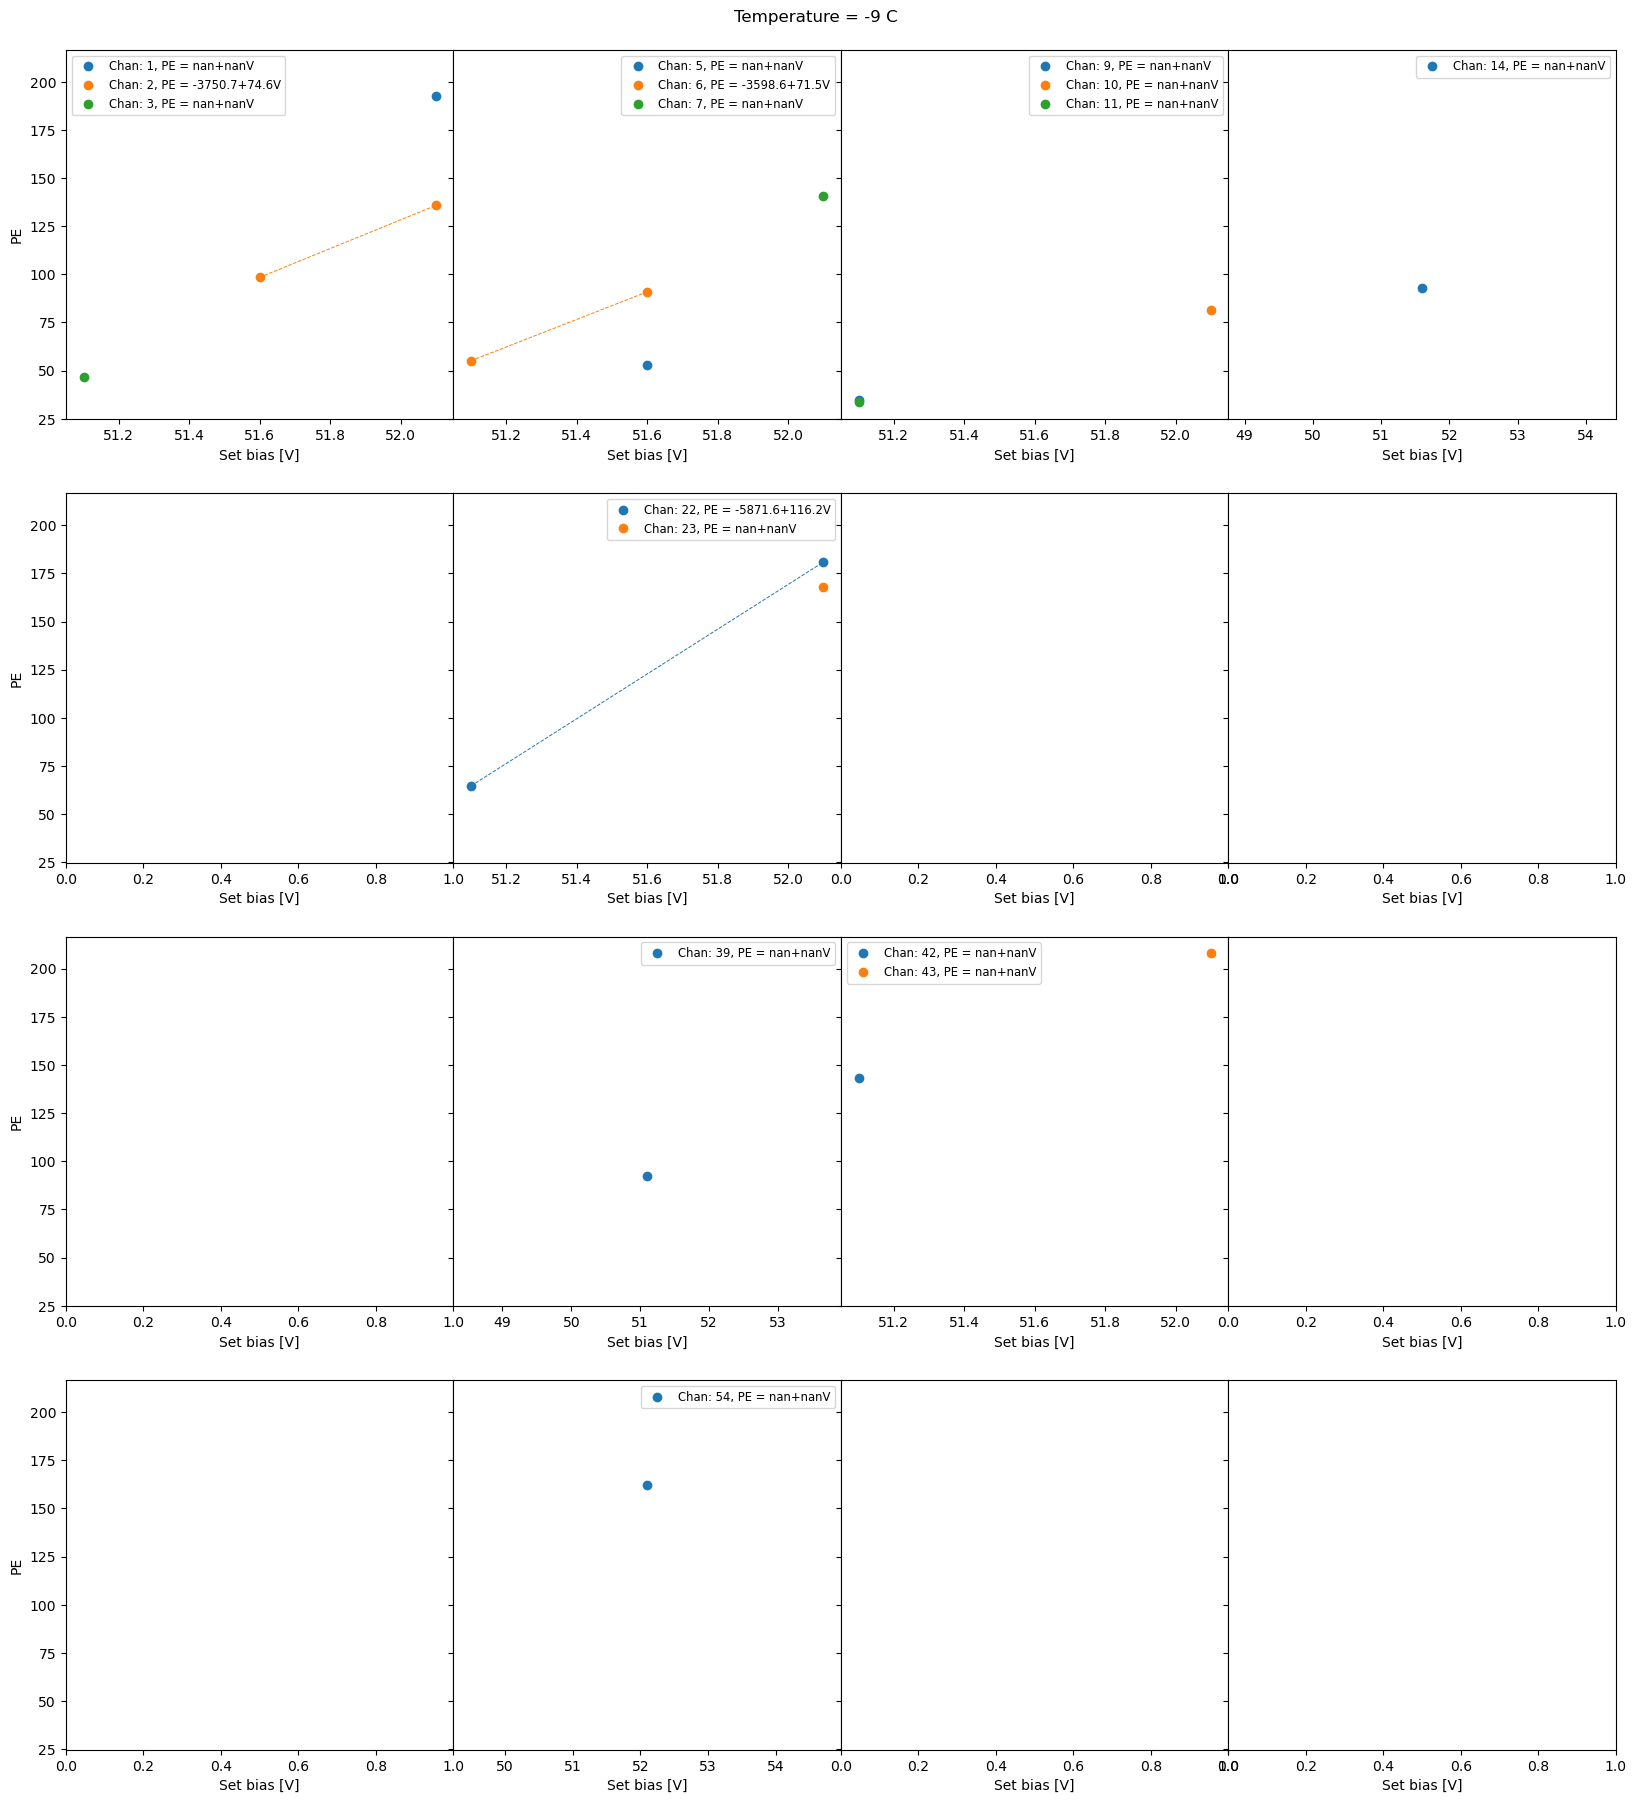

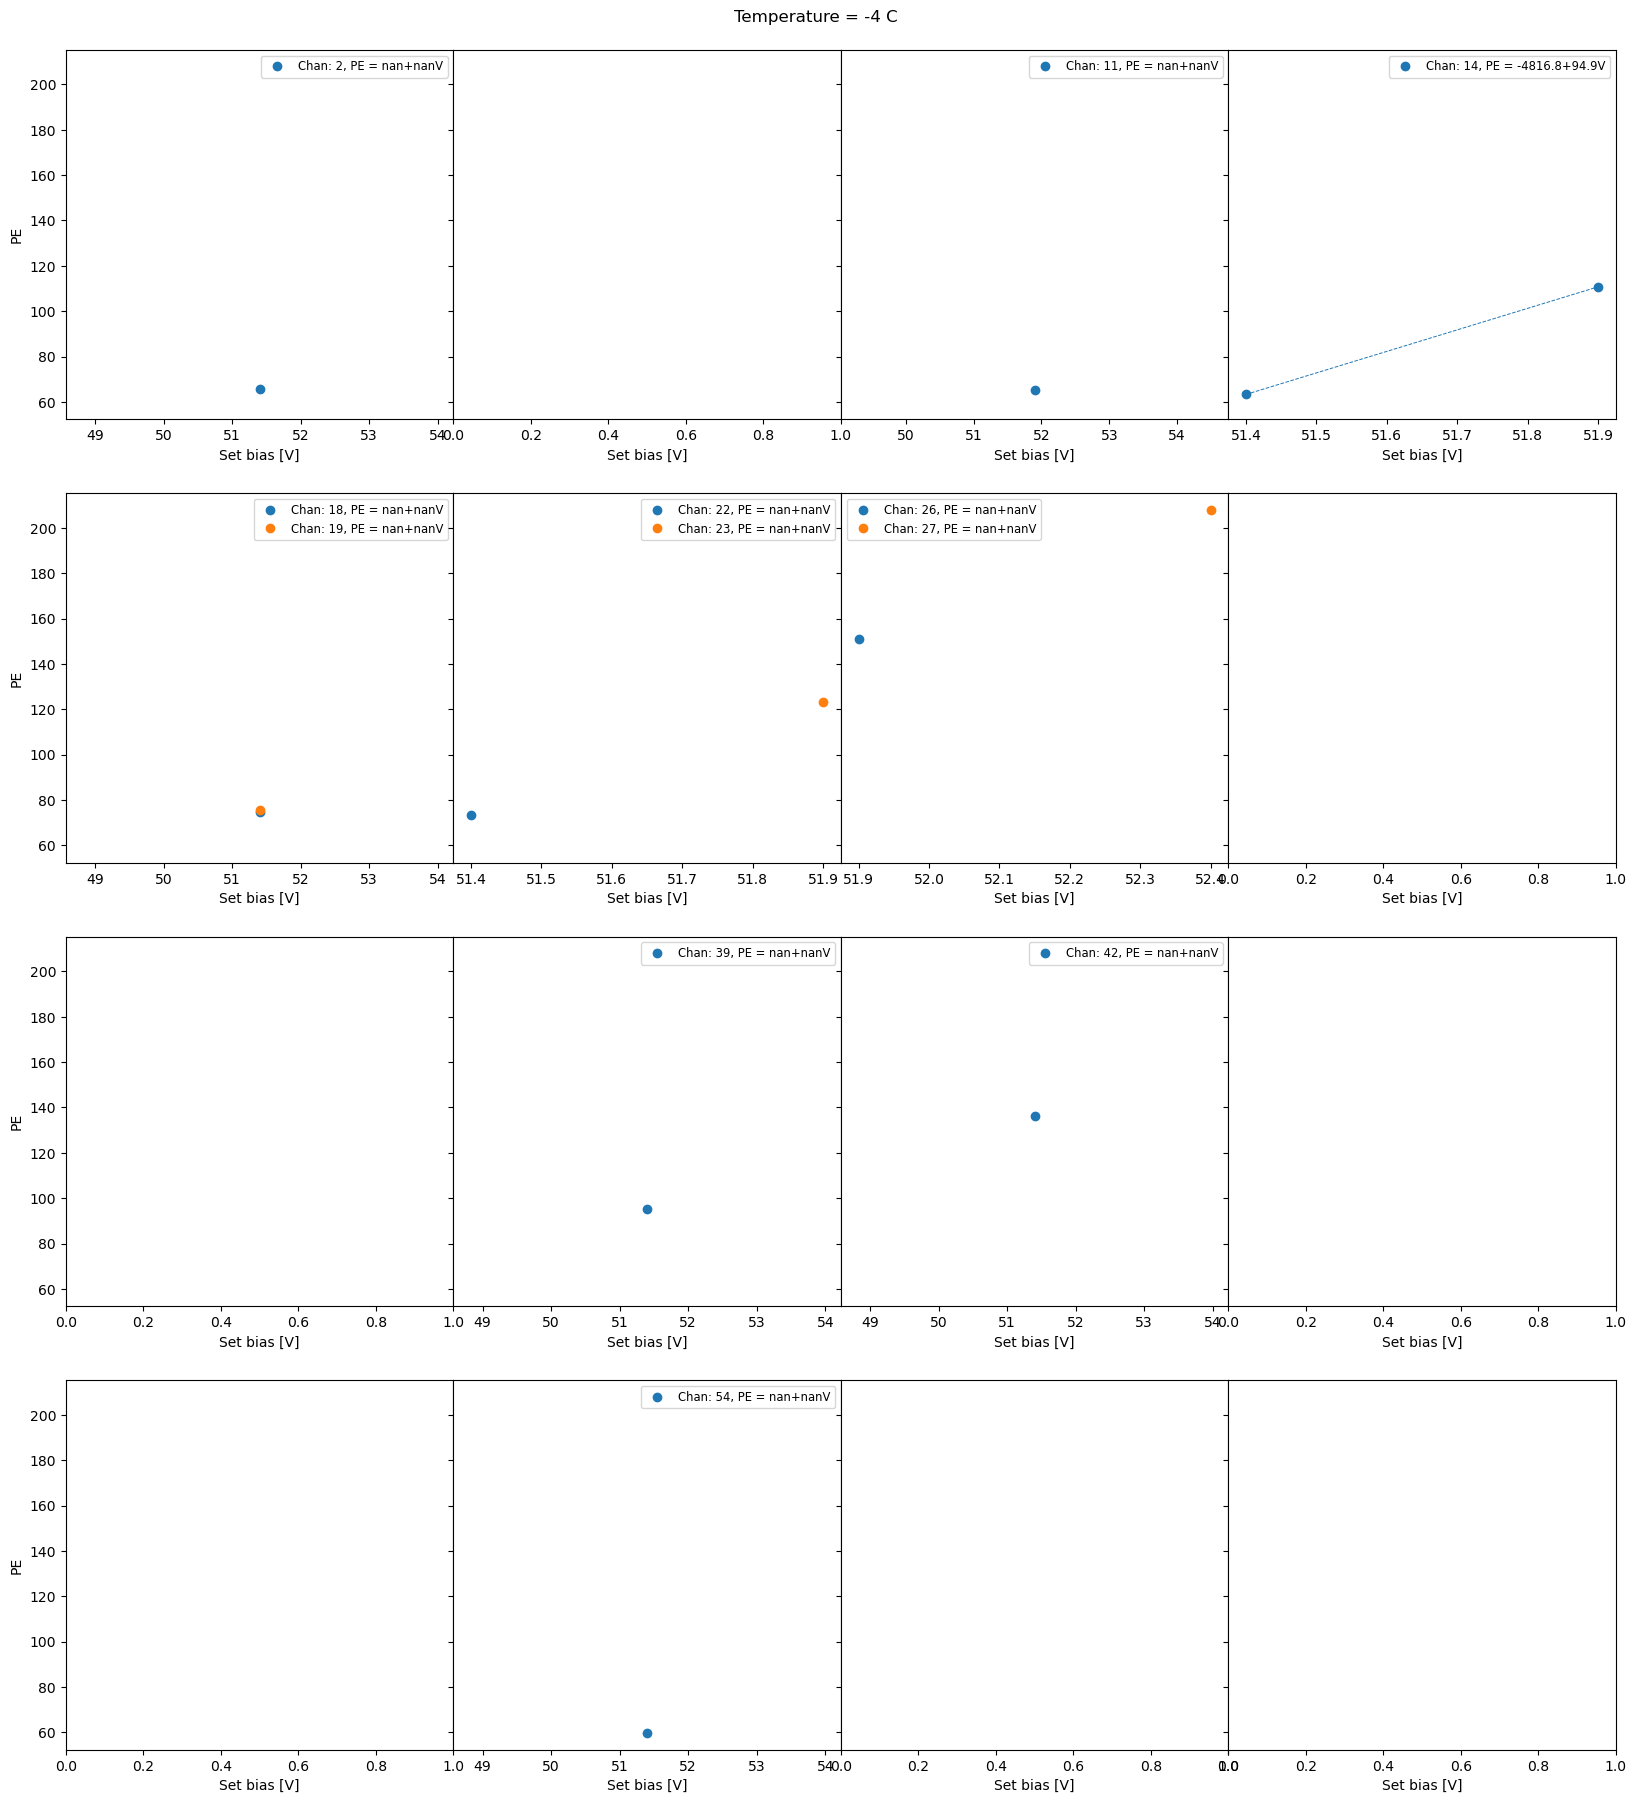

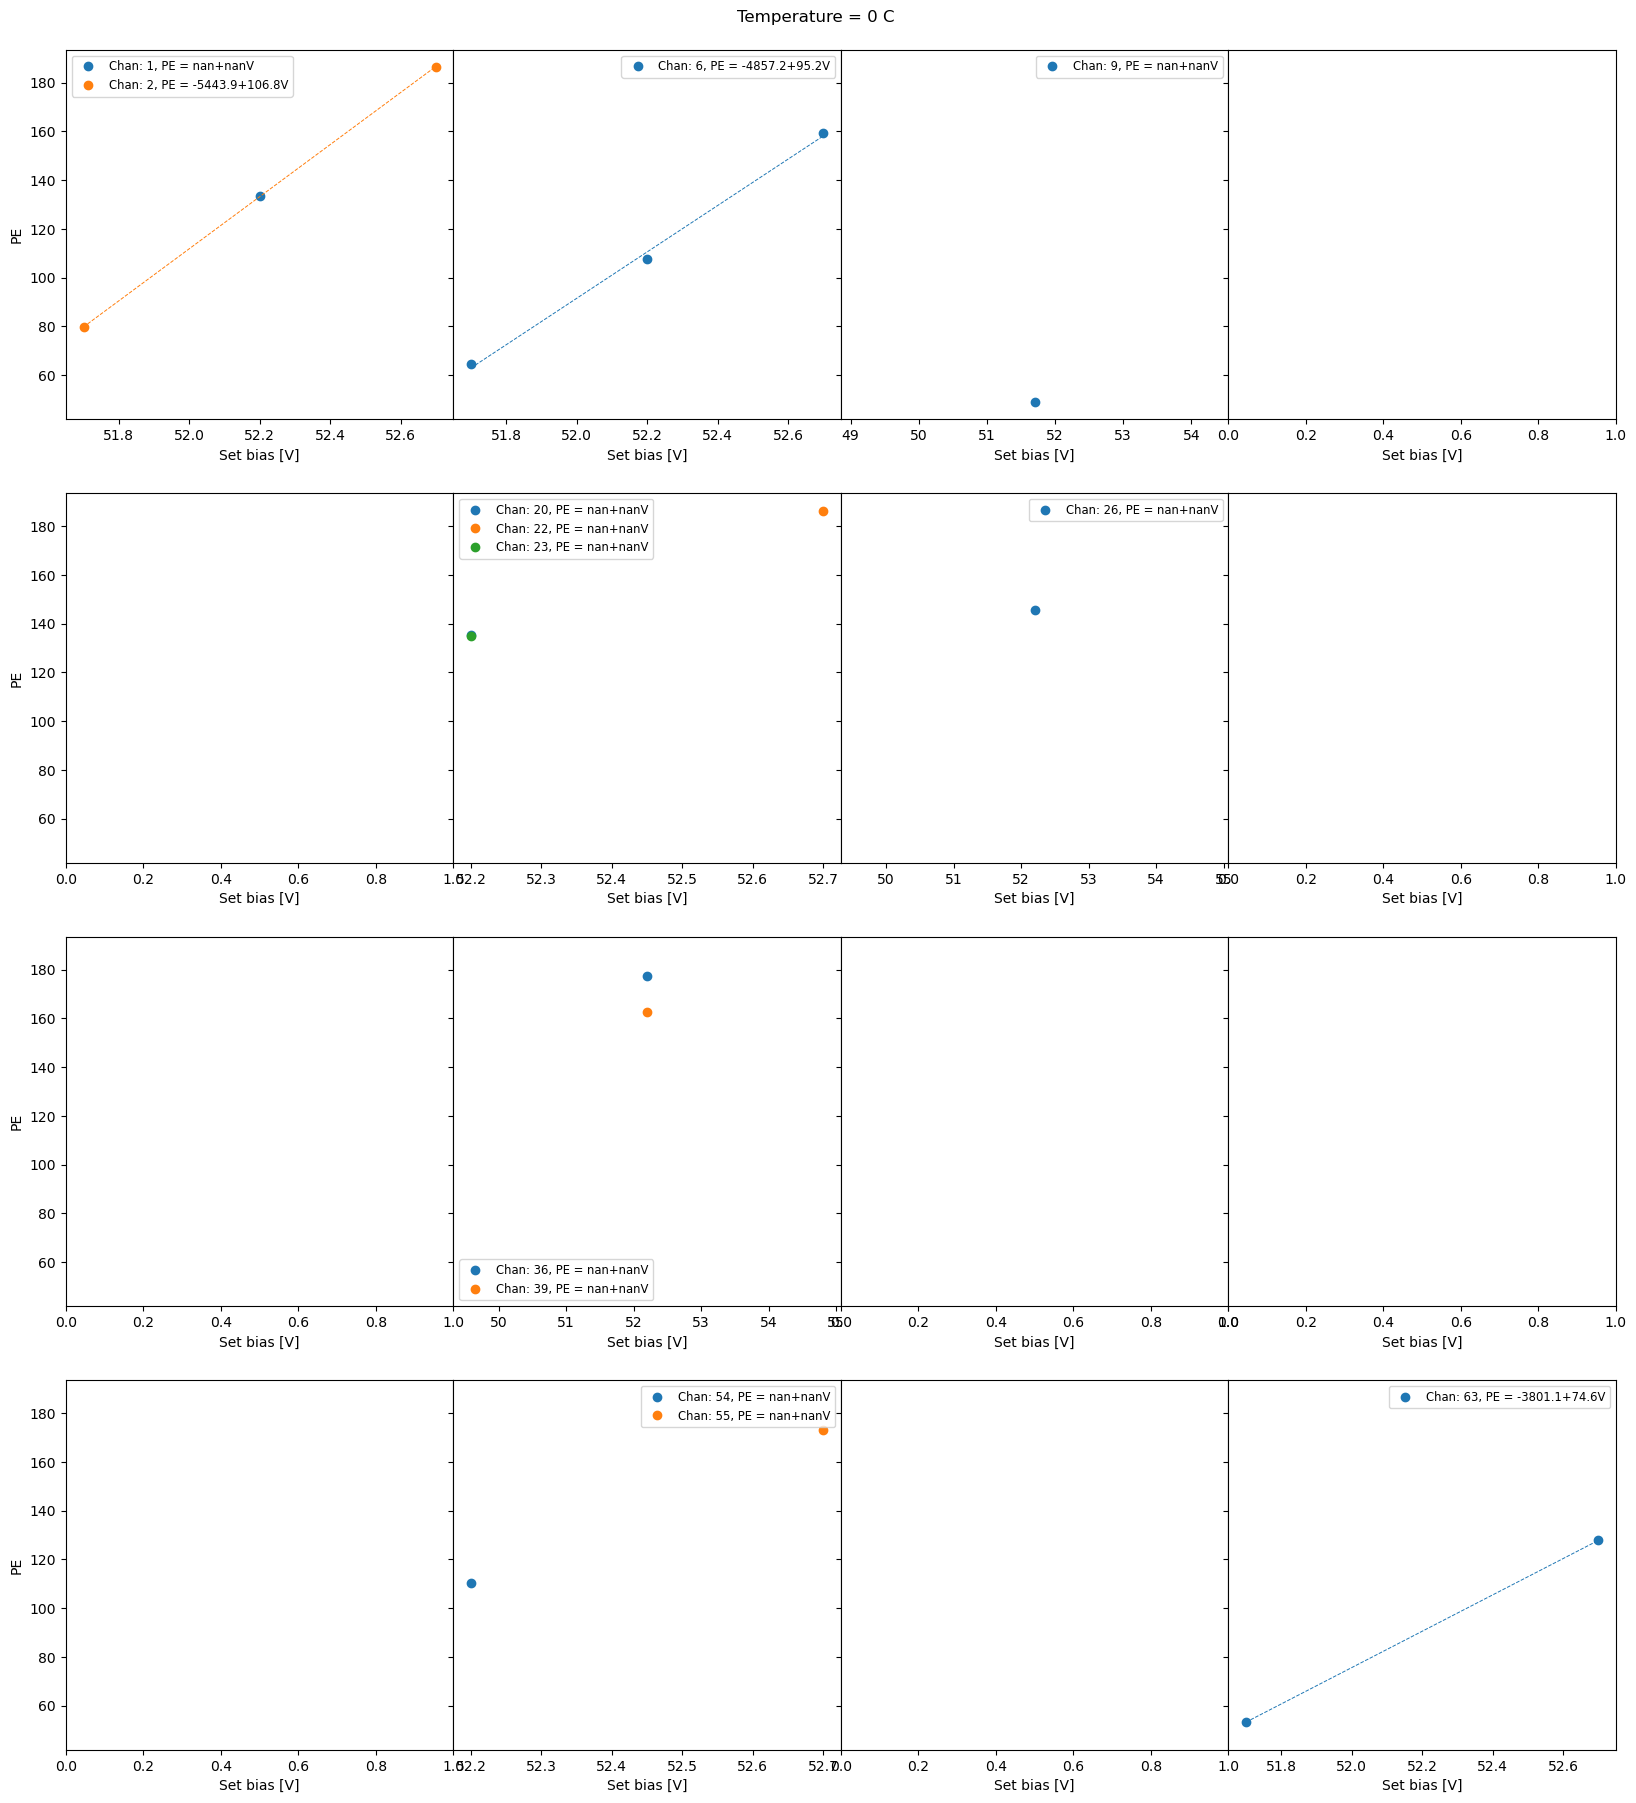

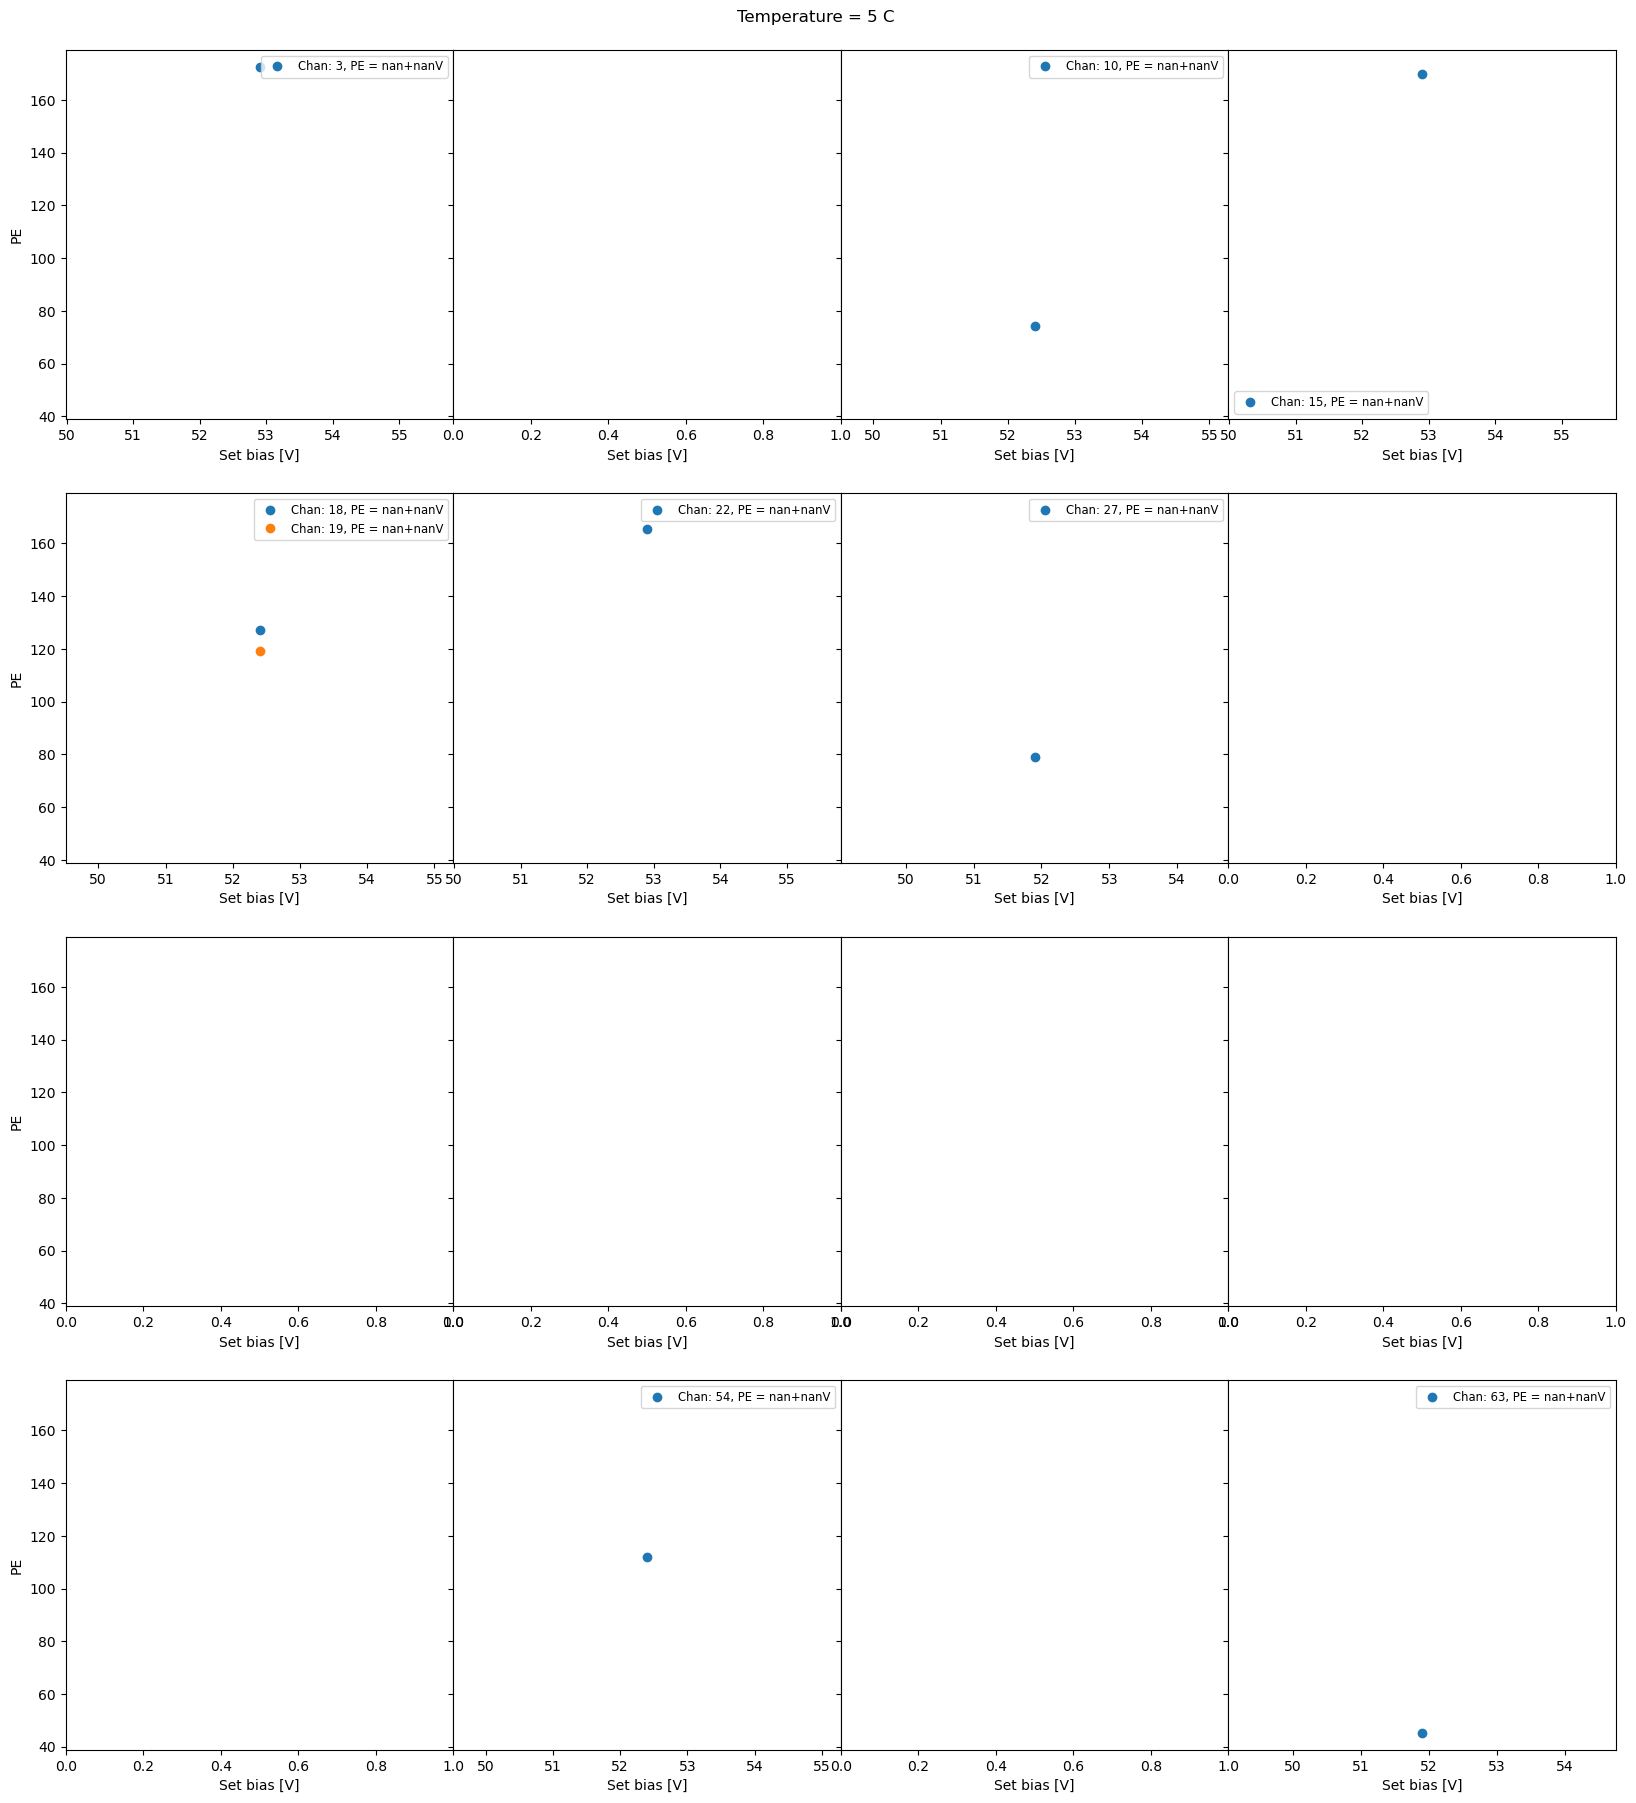

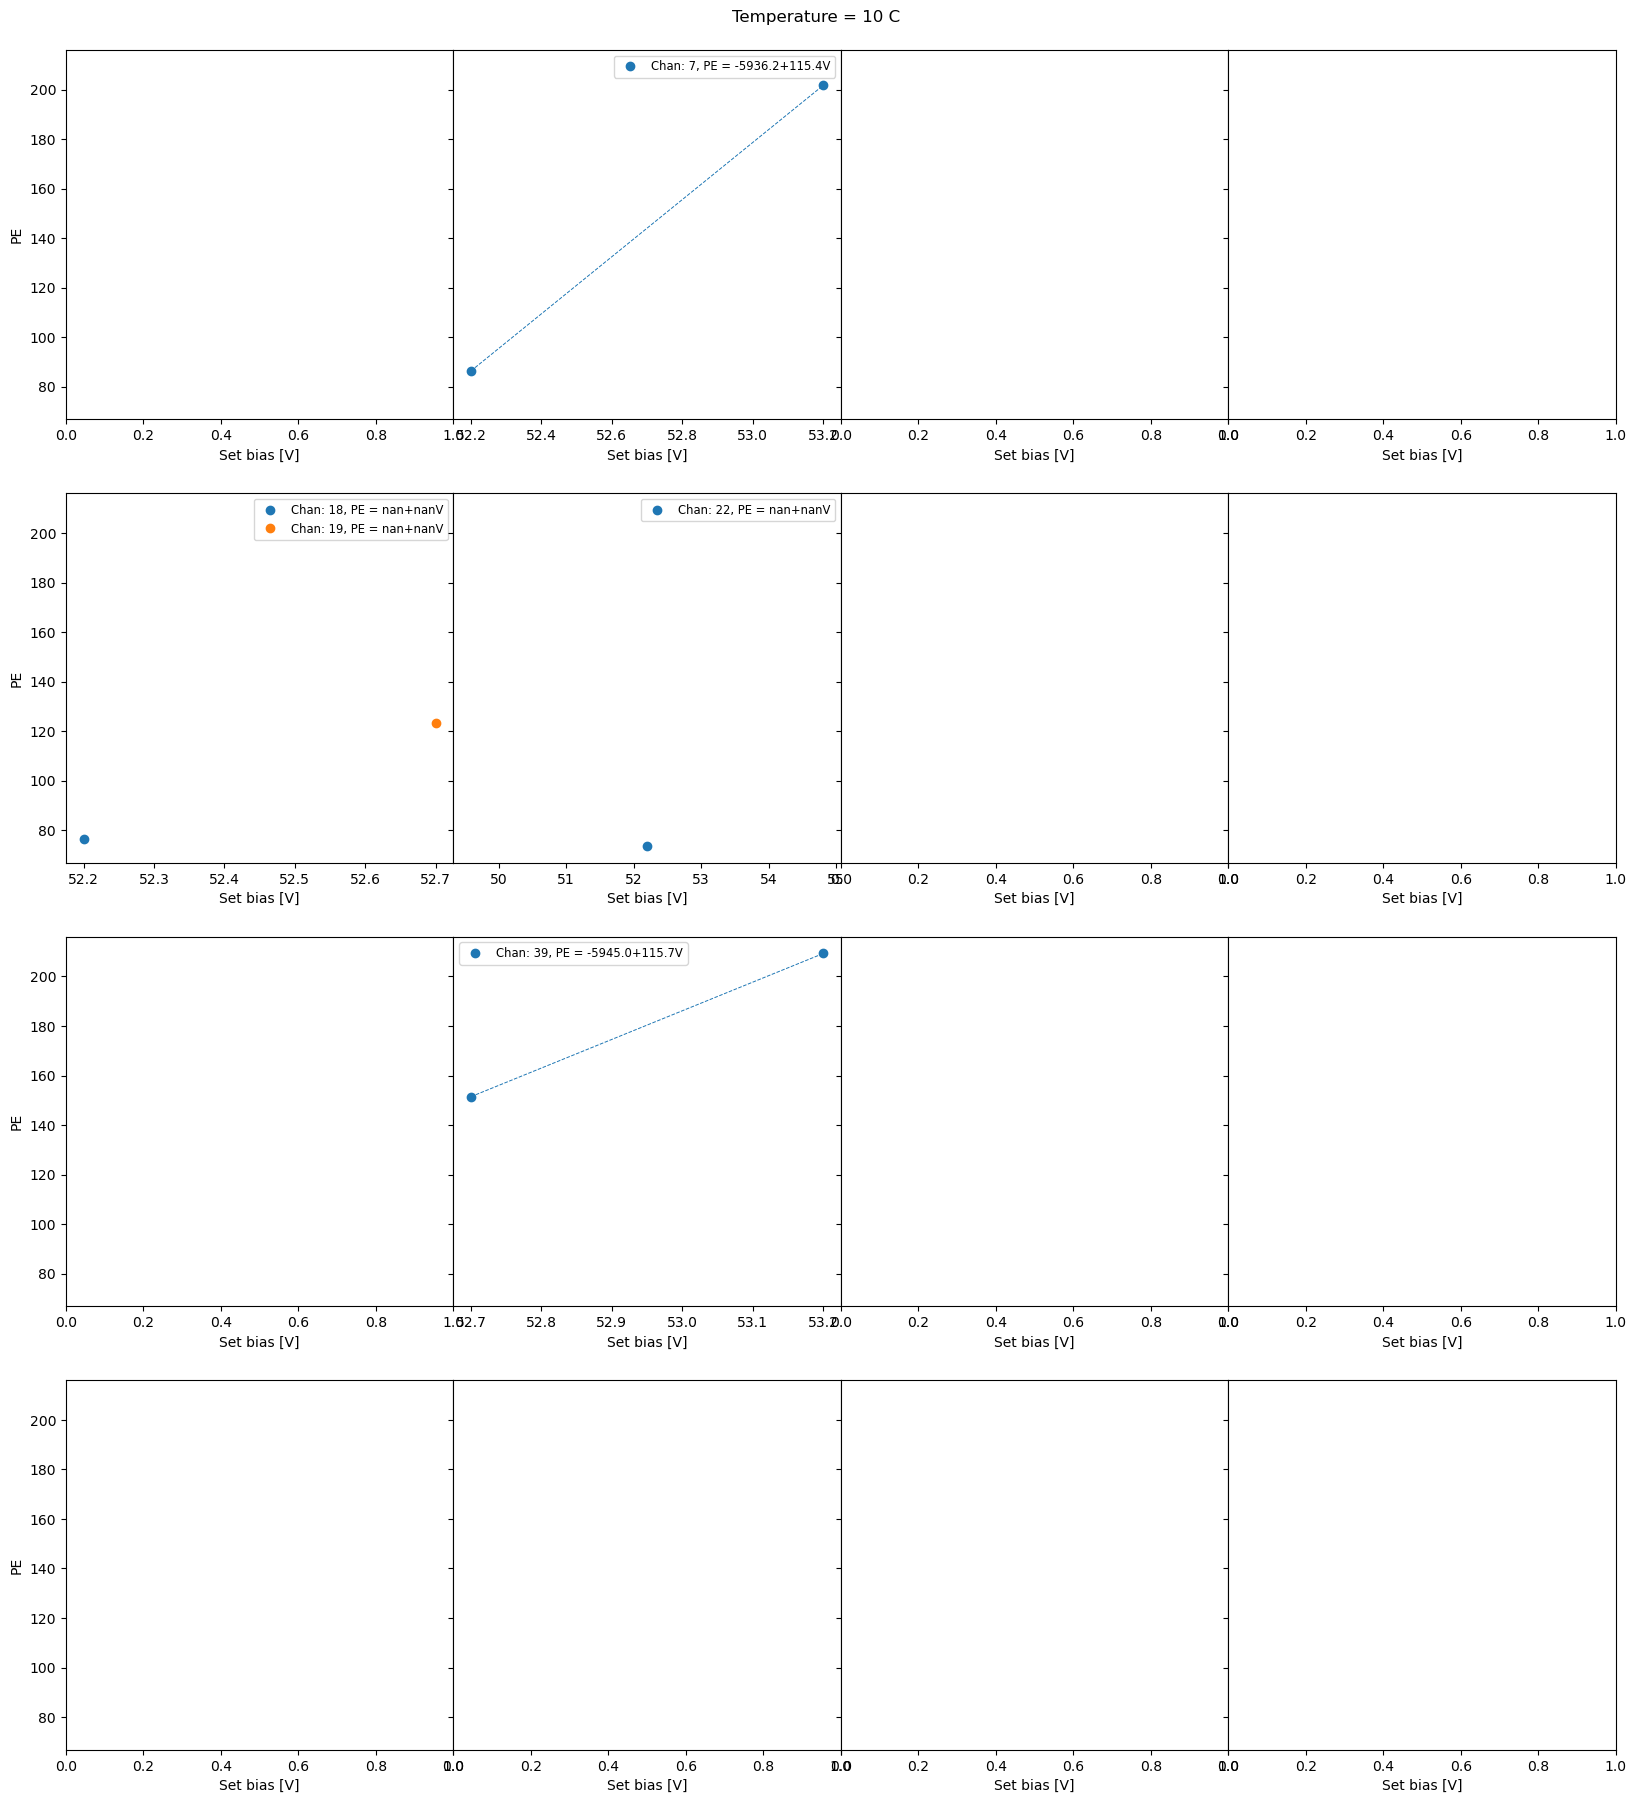

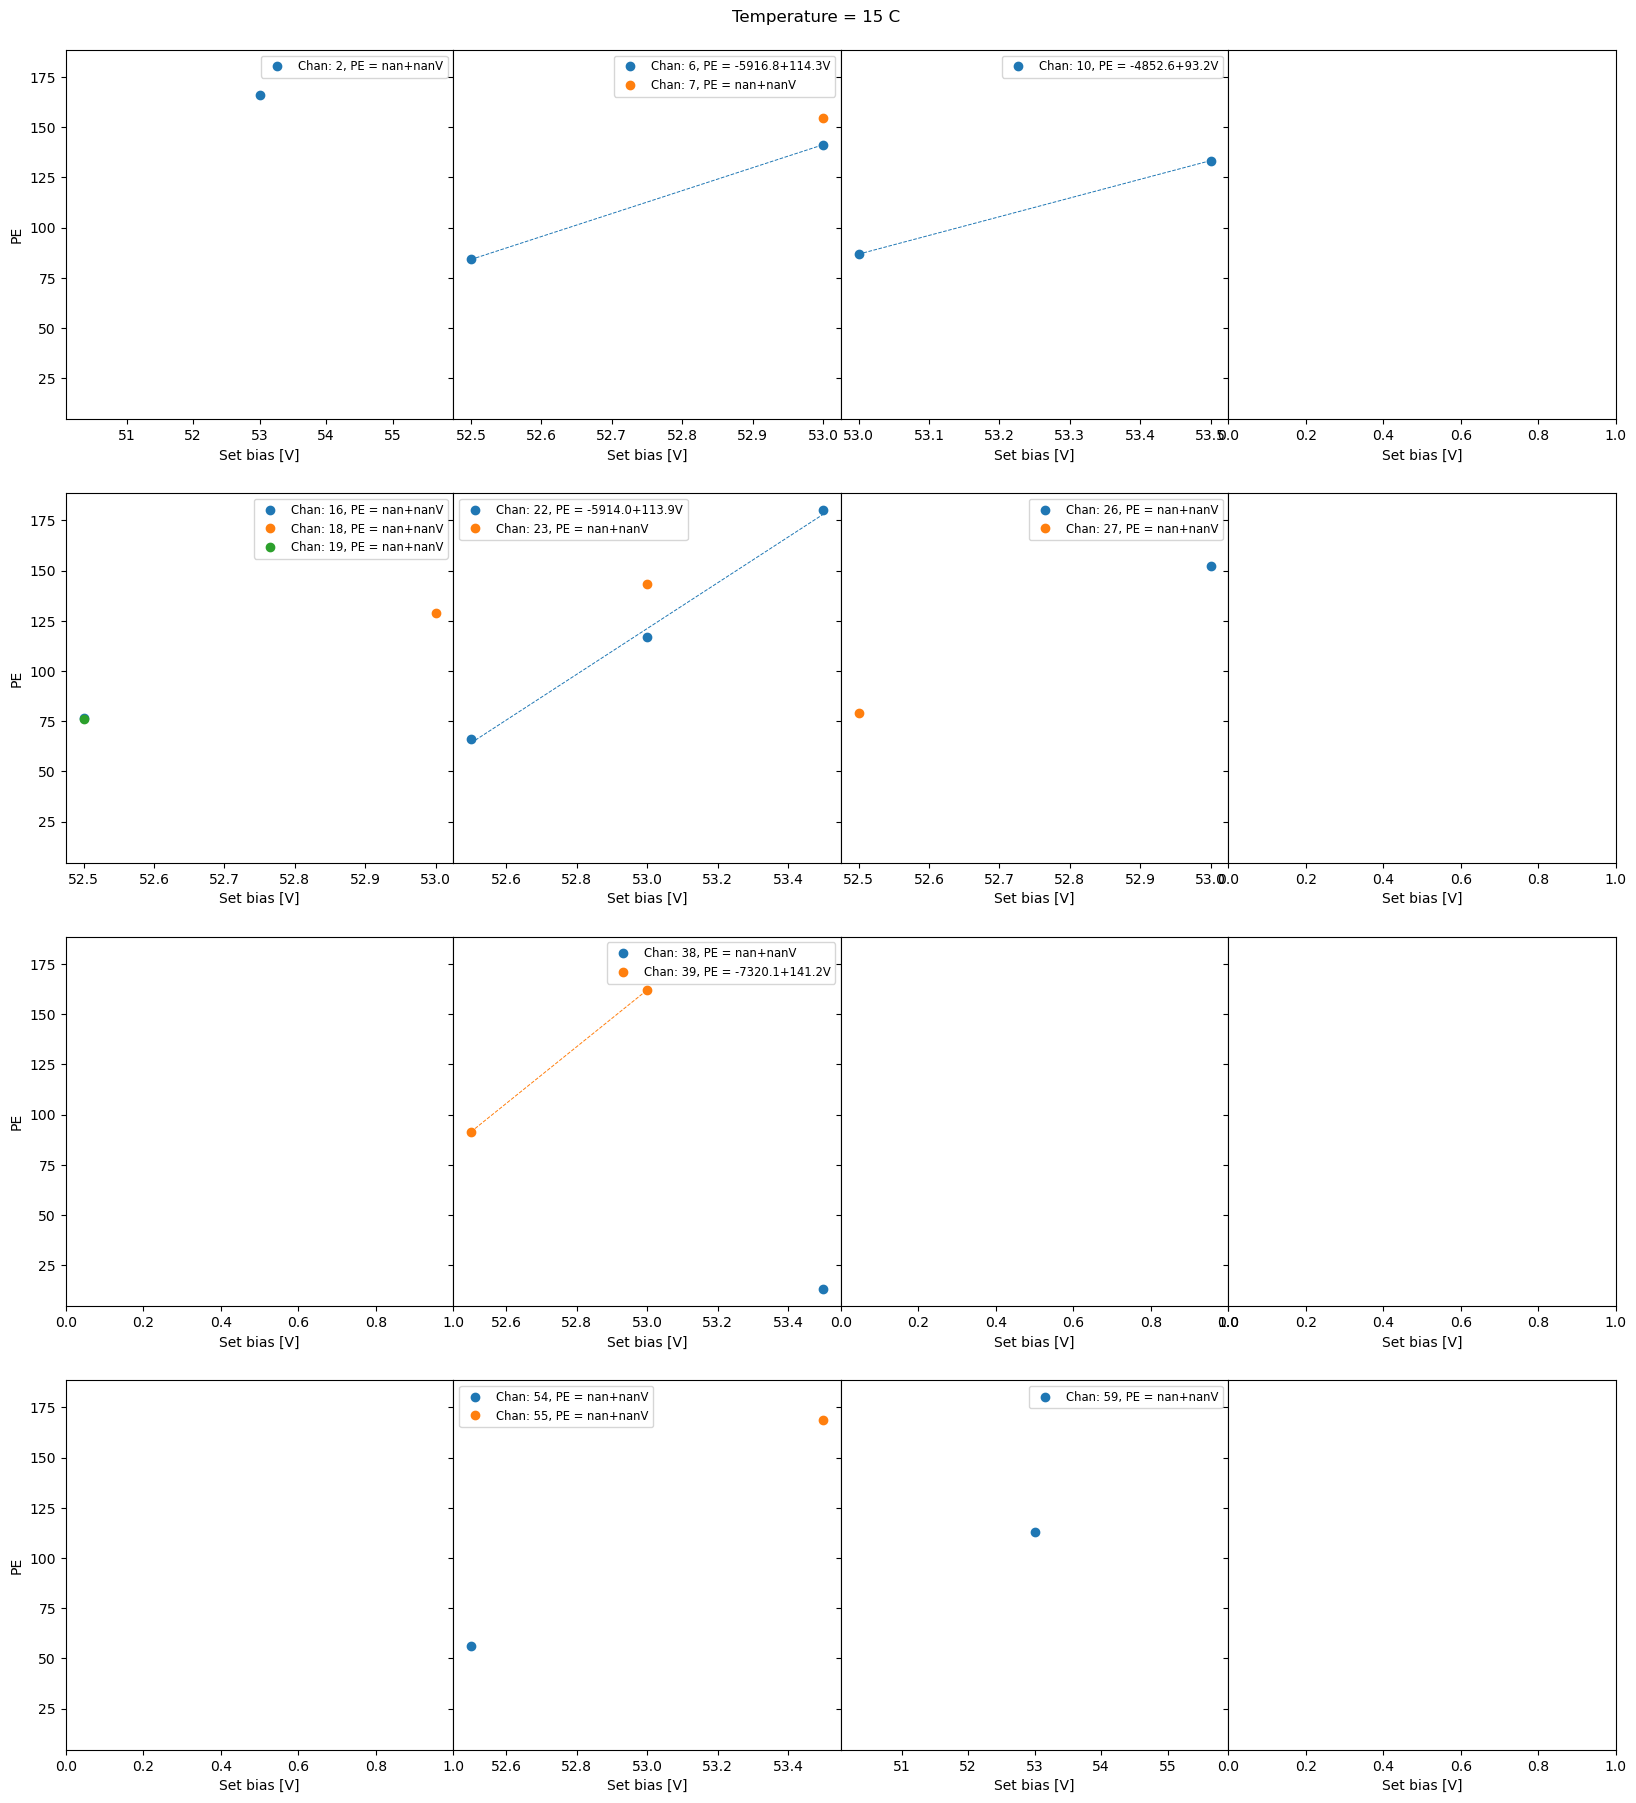

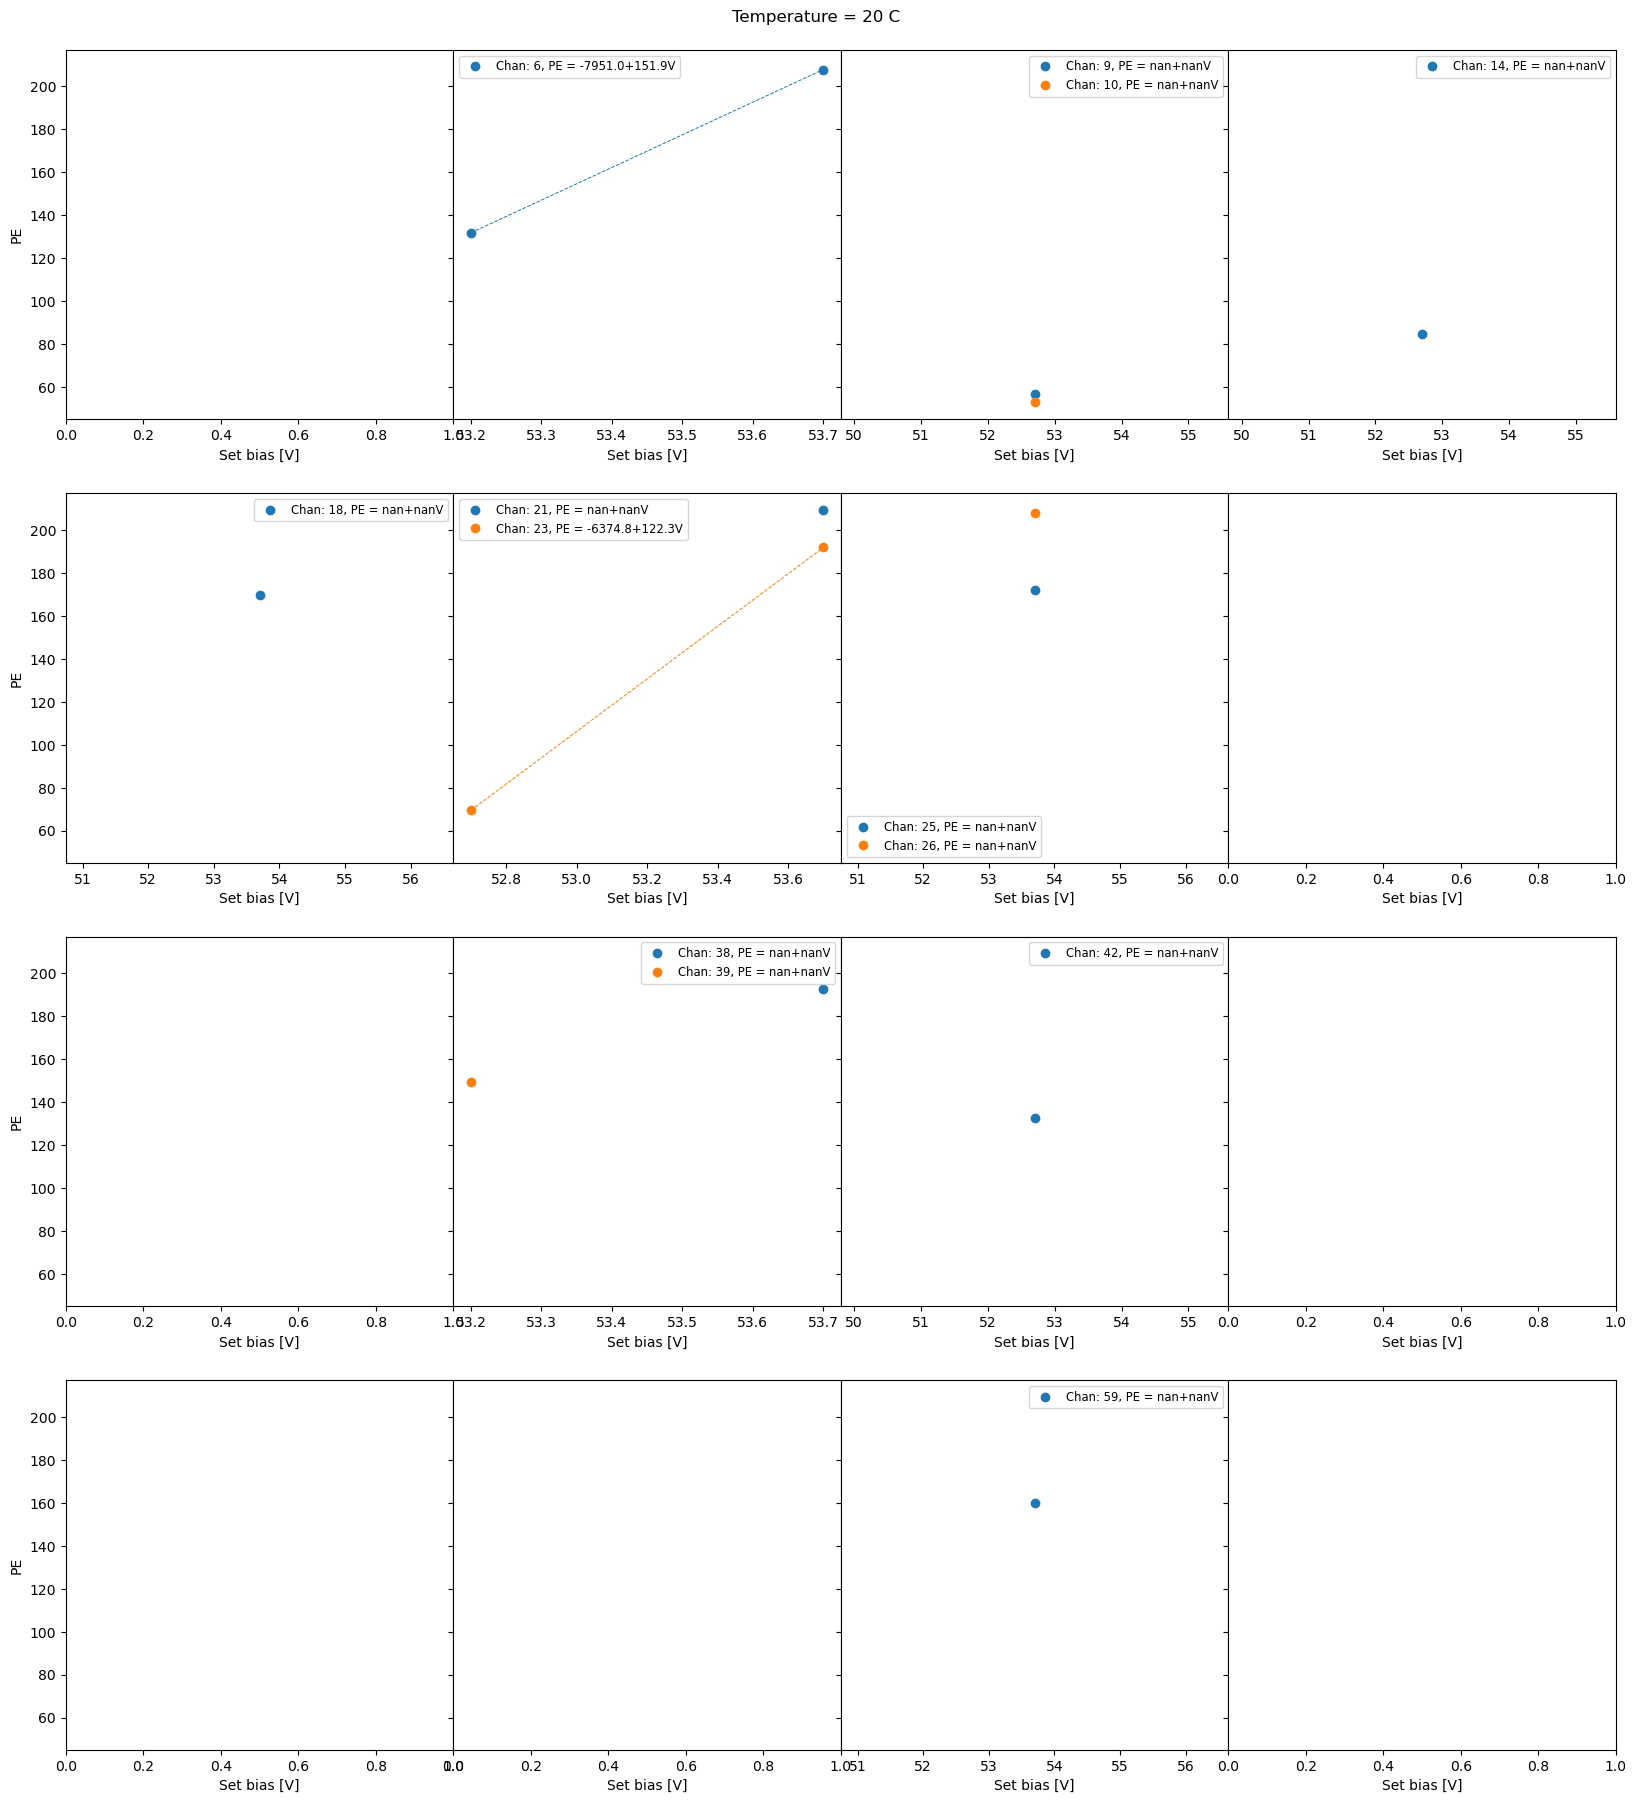

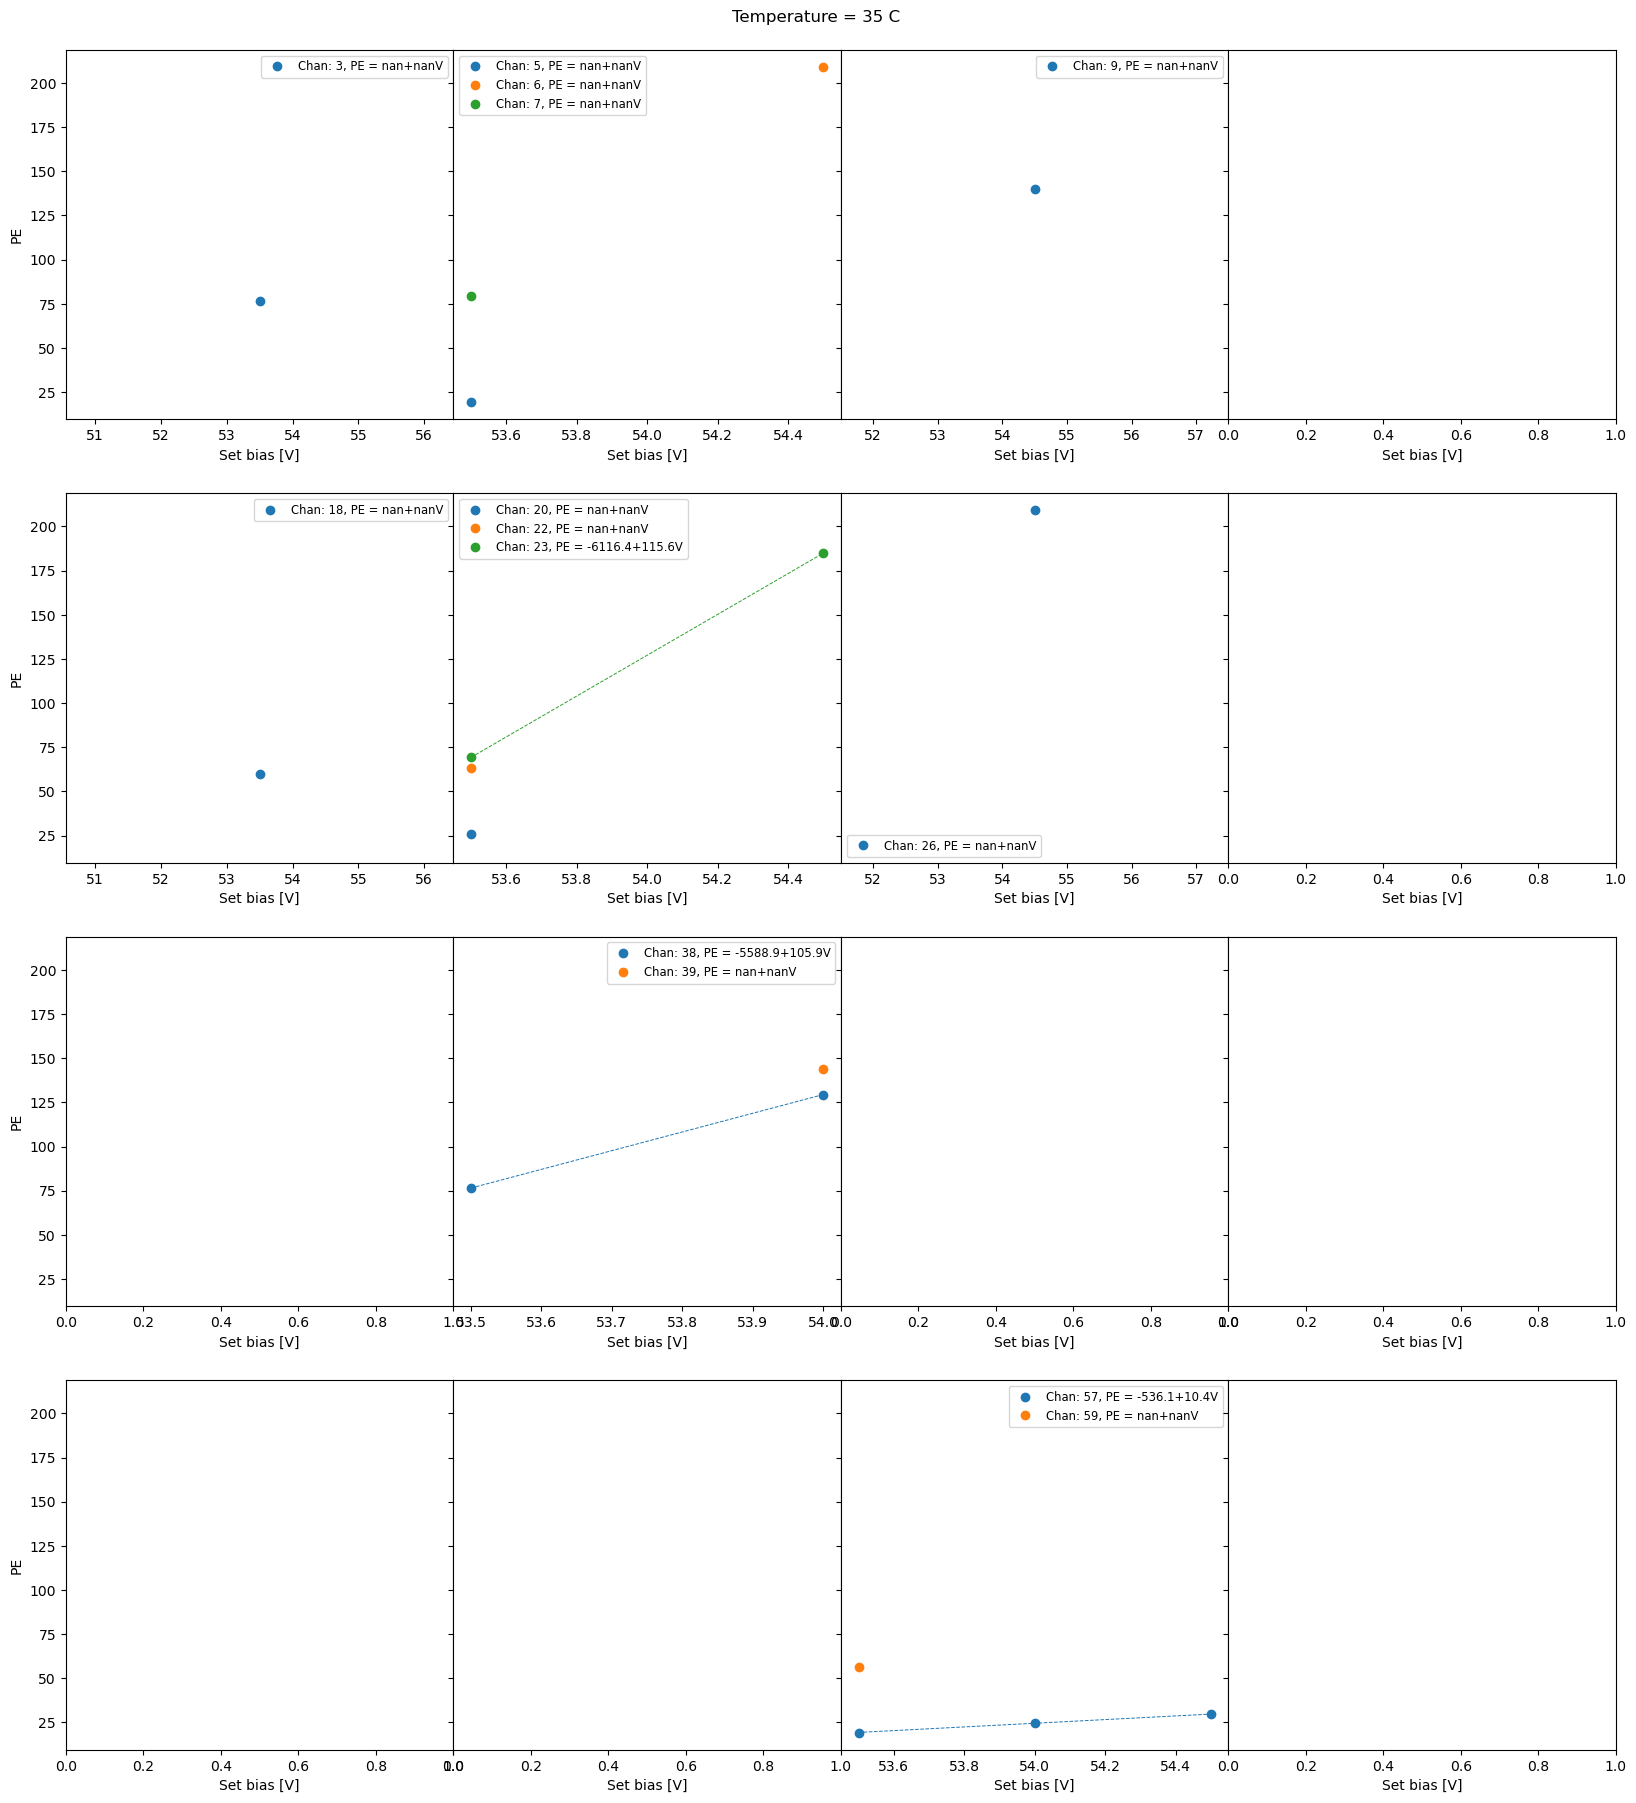

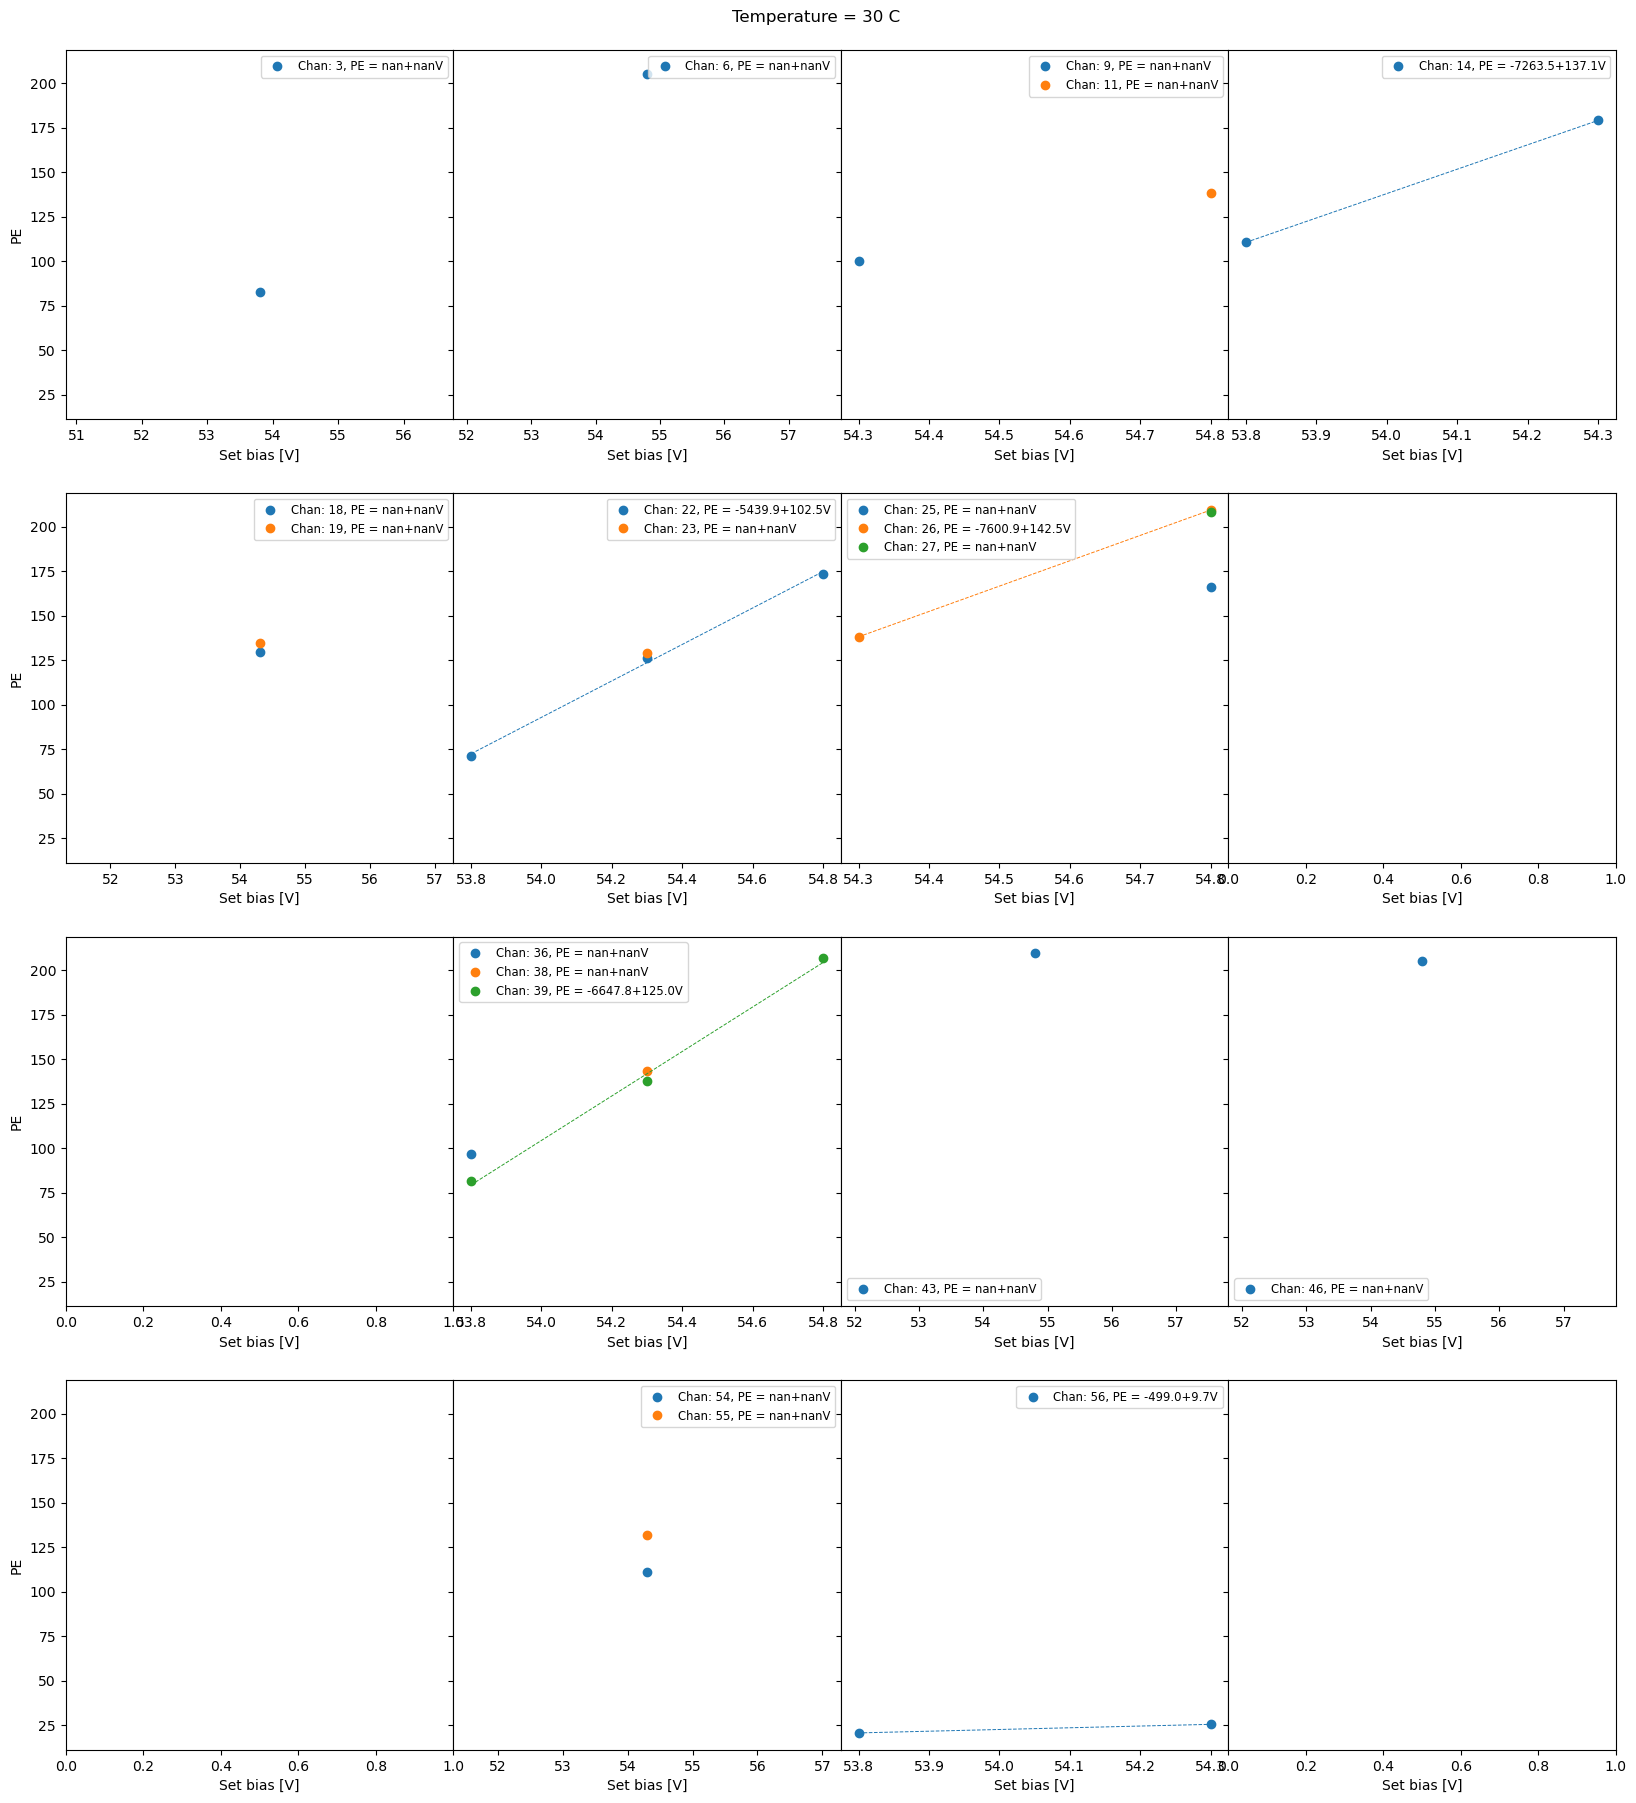

In [3]:
df = pd.DataFrame()

for idx, temp in enumerate(templist):
    processor = wideband.DataProcessor(usexroot=True, fixtimes=False, runlist=runlist[idx], userunlist=True, remove=False)
    arr, arSpills = processor.getData(DATASET) # get akward array for "runSummary" tree
    
    if not np.array_equal(np.array(runlist[idx]), arr['runNumber'].to_numpy()):
        print("Input run list order and data do not match")
    
    #Mask channels which were not calibrated
    var = 'PEs'    
    arSPE = ak.mask(arr[var], arr[var]>0).to_numpy()
    
    df_tmp = processTemperature(arSPE, idx)
    df = pd.concat([df, df_tmp], ignore_index=True)

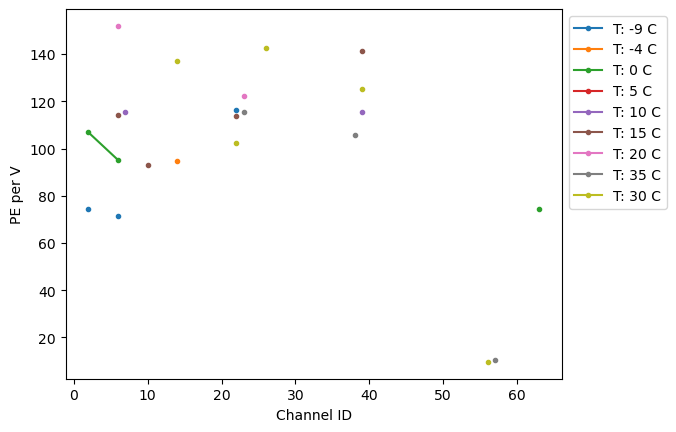

In [4]:
for temp in templist:
    plt.plot(df.query('temp == %f'%temp)['chan'], df.query('temp == %f'%temp)['slope'], '.-', label=('T: %d C'%temp))
plt.xlabel("Channel ID")
plt.ylabel("PE per V");
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0));

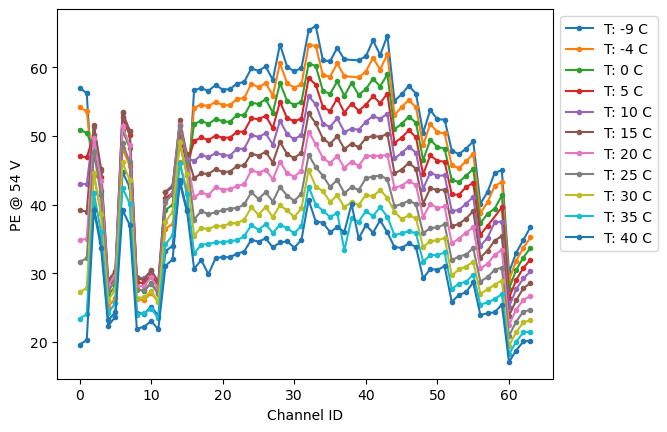

In [5]:
for temp in templist:
    plt.plot(df.query('temp == %f'%temp)['chan'], df.query('temp == %f'%temp)['spe_54V_fix'], '.-', label=('T: %d C'%temp))
plt.xlabel("Channel ID")
plt.ylabel("PE @ 54 V");
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0));

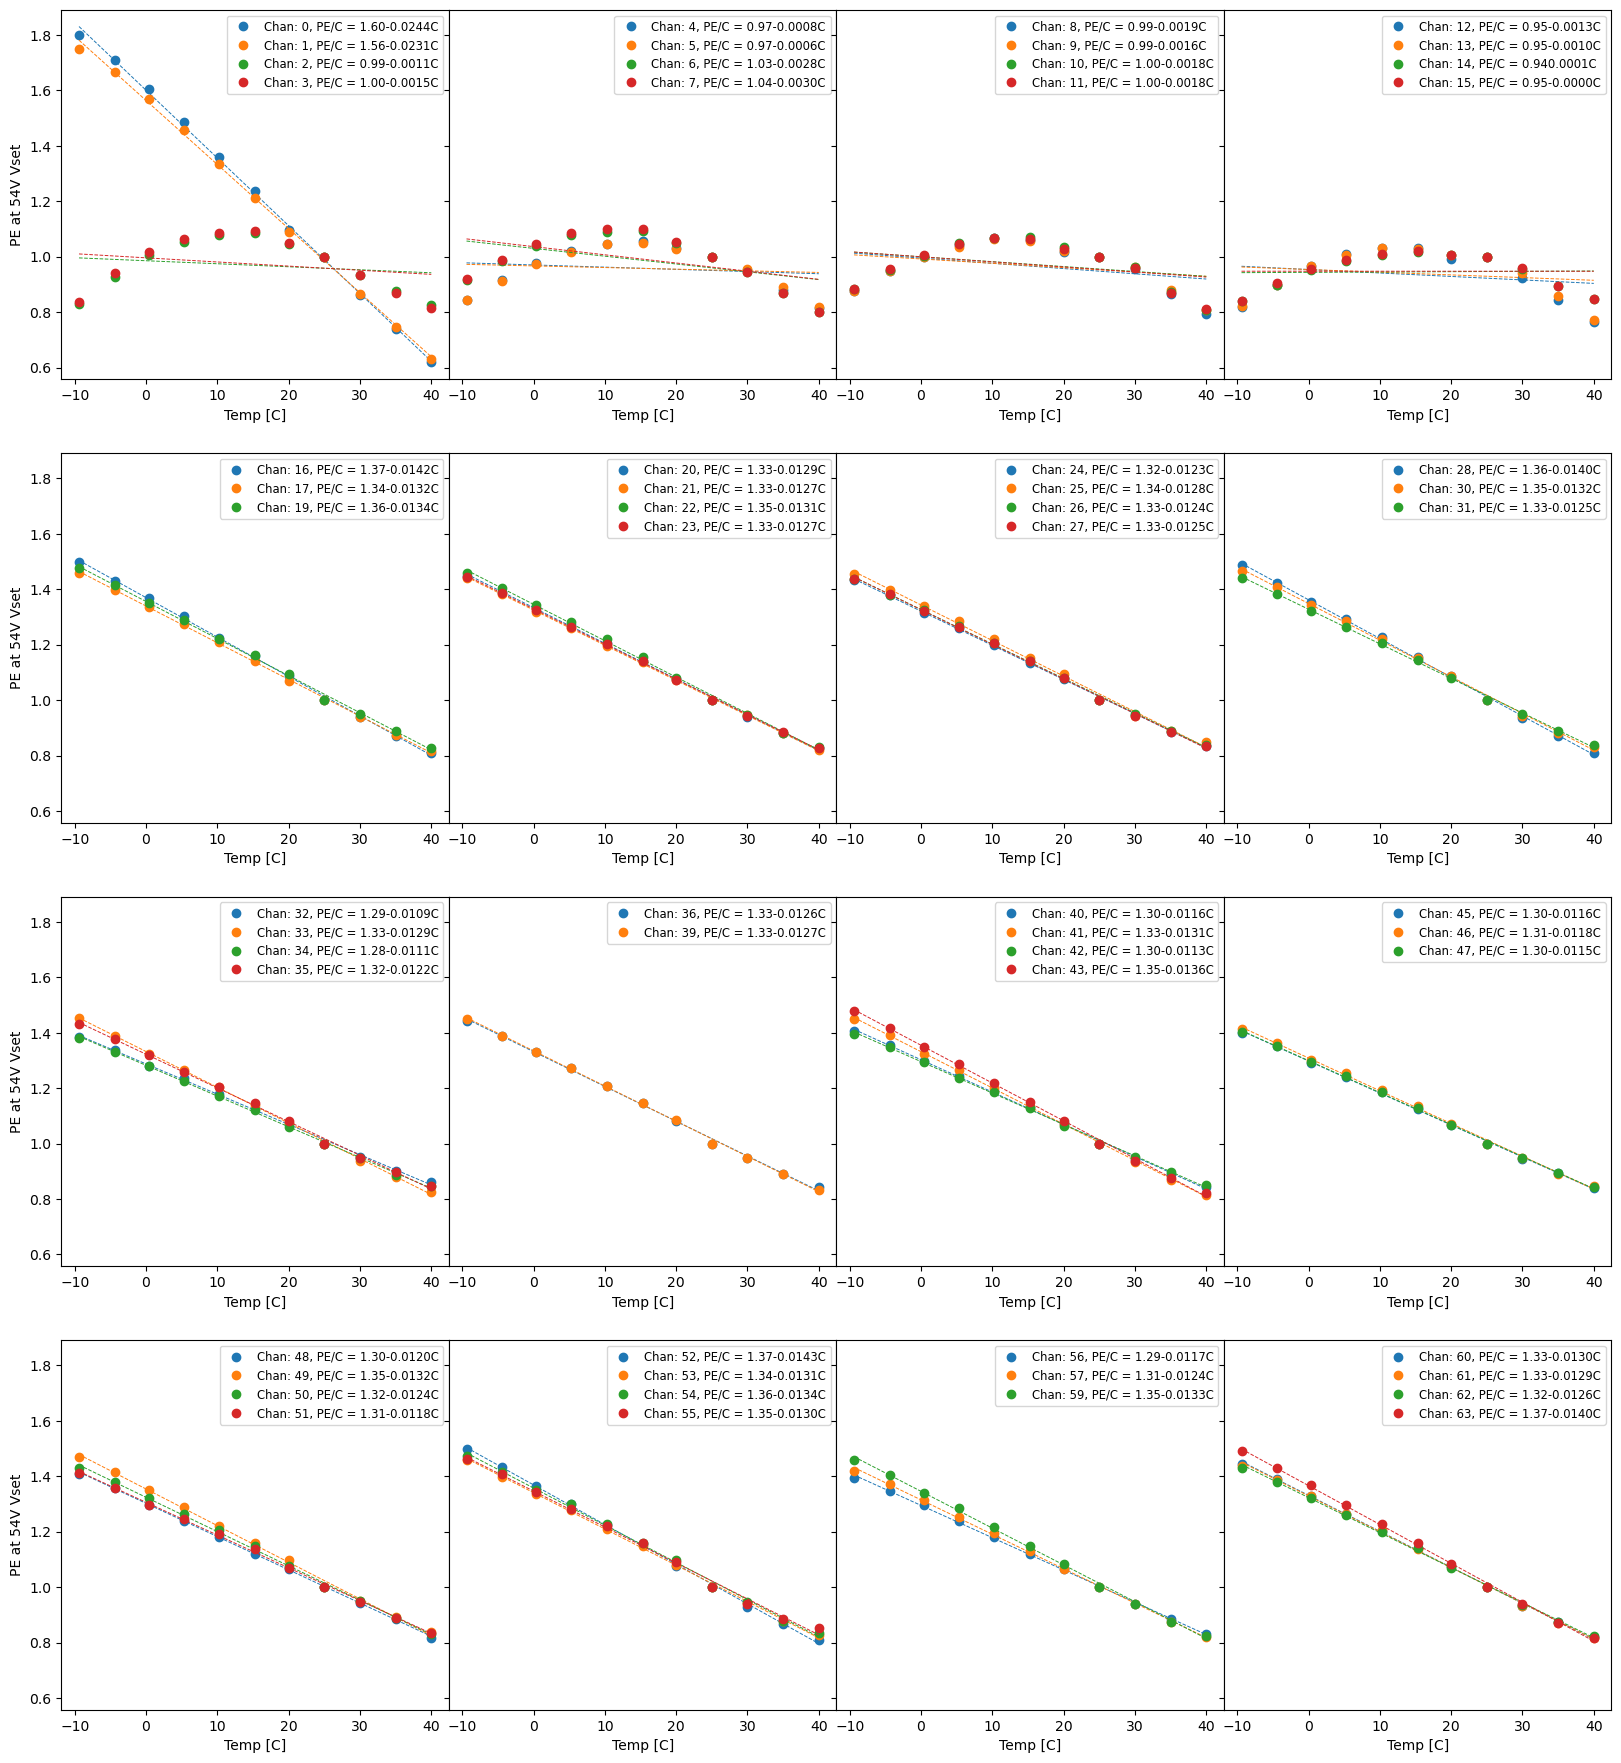

In [6]:
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(20, 20), sharey=True)
plt.subplots_adjust(wspace=0)
fig.subplots_adjust(top=0.96)

dfSPE_Temp = pd.DataFrame(columns=['chan', 'slope', 'intercept', 'r_value', 'p_value', 'std_err'])


for hdmi, ax in enumerate(axs.flatten()):
    ax.set_xlabel("Temp [C]")
    if(hdmi%4 == 0):
        ax.set_ylabel("PE at 54V Vset")
    for inhdmi_chan in range(4):
        chan = hdmi*4+inhdmi_chan
        if chan in badchannels:
            continue
            
        x = df.query('chan==%d'%chan)['temp']
        y = df.query('chan==%d'%chan)['spe_54V_fix'].to_numpy()
        y=y/y[7]

        slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
        markers = ax.plot(x, y, 'o', label='Chan: %d, PE/C = %.2f%.4fC'%(chan, intercept, slope))
        ax.plot(x, slope * x + intercept, '--', color = markers[0].get_color(), linewidth=0.7)
        ax.legend(fontsize='small')
        new_row = {'chan': chan, 'slope': slope, 'intercept': intercept,
                   'r_value': r_value, 'p_value': p_value, 'std_err': std_err}
        dfSPE_Temp.loc[len(dfSPE_Temp)] = new_row

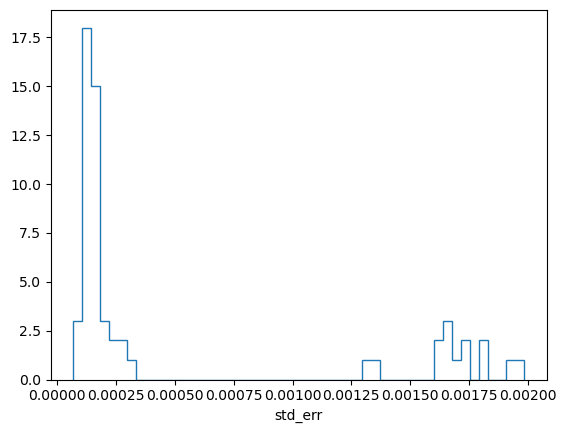

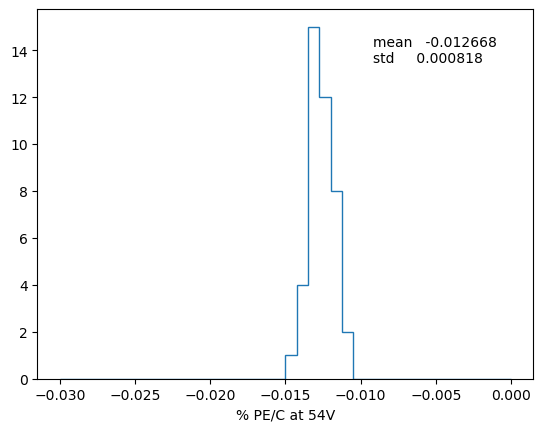

In [9]:
plt.hist(dfSPE_Temp['std_err'], histtype='step', bins=50);
plt.xlabel('std_err')
plt.figure()
plt.hist(dfSPE_Temp.query('std_err<0.3 & chan > 15')['slope'], histtype='step', bins=40, range=(-0.03,0));
plt.xlabel('% PE/C at 54V');
plt.figtext(0.65,0.77, dfSPE_Temp.query('std_err<0.3 & chan > 15')['slope'].describe().loc[['mean','std']].to_string());

In [8]:
pd.set_option('display.max_rows', None)
df

,chan,slope,temp,intercept,r_value,p_value,std_err,Vbd,spe_3V_over,spe_53V_fix,spe_54V_fix,spe_55V_fix,spe_60V_fix,spe_65V_fix
0,0,10.075439,-9.4,-487.042793,0.998738,2.346506e-10,0.918689,48.339609,30.226318,46.955484,57.030923,67.106363,117.483559,167.860755
1,1,9.405028,-9.4,-451.680047,0.996811,6.014058e-09,1.453221,48.025380,28.215084,46.786446,56.191474,65.596502,112.621643,159.646783
2,2,6.345351,-9.4,-303.216714,0.999657,2.466256e-12,0.473349,47.785651,19.036052,33.086871,39.432221,45.777572,77.504325,109.231078
3,3,5.657237,-9.4,-270.923807,0.997065,4.494564e-09,1.389749,47.889771,16.971712,28.909780,34.567018,40.224255,68.510443,96.796630
4,4,4.103566,-9.4,-198.447206,0.999455,1.246746e-11,0.603921,48.359702,12.310697,19.041767,23.145332,27.248898,47.766726,68.284553
5,5,4.250382,-9.4,-205.204292,0.998633,3.104143e-10,0.955047,48.279021,12.751147,20.065966,24.316349,28.566731,49.818642,71.070553
6,6,7.840758,-9.4,-378.658251,0.999367,2.095755e-11,0.649596,48.293579,23.522273,36.901903,44.742661,52.583418,91.787206,130.990994
7,7,7.346178,-9.4,-354.160346,0.999094,7.350476e-11,0.775981,48.210148,22.038535,35.187111,42.533289,49.879468,86.610360,123.341252
8,8,4.021618,-9.4,-192.926991,0.998753,2.252756e-10,0.906405,47.972483,12.064853,20.218751,24.240369,28.261986,48.370075,68.478164
9,9,4.026171,-9.4,-193.339142,0.997606,2.205177e-09,1.258155,48.020600,12.078513,20.047917,24.074088,28.100259,48.231113,68.361968
